### Mean Field SU(2) NJL + Diquark Cond.

In [3]:
import scipy


from math import sqrt, pi, log, exp, atan
import scipy.integrate
import numpy as np

from syntax_sugar import *
import matplotlib.pyplot as plt


Nc = 3.0
Nf = 2.0

m0 = 5.5

Gs = 5.04e-6
Gv = 1 * Gs
Gd = 1 * Gs
Lamba_CutOff = 651


ND_Integral_Bound = np.inf


def Ep(p, m):
    return sqrt(m**2 + p**2)

def epsilonpm( p , m , mu_star, s):
    if s == 1:
        return Ep(p,m) + mu_star
    if s == -1:
        return Ep(p,m) - mu_star
    
def Epm( p , m , mu_star, Delta, s):
        return sqrt(epsilonpm( p , m , mu_star, s)**2 + Delta**2 + 1e-9)




def n(E,T):
    if T == 0:
        return np.heaviside(-(E ),0.5)
    else:
        try:
            a = exp(-(E )/T) / (1 + exp(-(E)/T))
            return a
        except:
            return 1 / (1 + exp((E )/T))



def Potential(x, T, mu):
    m, mu_star, Delta = x

    C = (m - m0)**2 / (4*Gs)
    C += - (mu_star - mu)**2 / (4*Gv)
    C += Delta**2 / (4*Gd)

    Q = scipy.integrate.quad( lambda p: p**2 * Epm( p , m , mu_star, Delta, 1), 1e-8, Lamba_CutOff, limit = 200000 )[0]
    Q += scipy.integrate.quad( lambda p: p**2 * Epm( p , m , mu_star, Delta, -1), 1e-8, Lamba_CutOff, limit = 200000 )[0]
    Q += scipy.integrate.quad( lambda p: p**2 * Ep( p , m), 0, Lamba_CutOff, limit = 200000 )[0]

    if T == 0:
        Q += scipy.integrate.quad( lambda p: p**2 * -2*Epm( p , m , mu_star, Delta, 1)*np.heaviside(-Epm( p , m , mu_star, Delta, 1), 0.5), 1e-8, ND_Integral_Bound, limit = 200000)[0]
        Q += scipy.integrate.quad( lambda p: p**2 * -2*Epm( p , m , mu_star, Delta, -1)*np.heaviside(-Epm( p , m , mu_star, Delta, -1) ,0.5), 1e-8, ND_Integral_Bound, limit = 200000)[0]
        Q += scipy.integrate.quad( lambda p: p**2 * -epsilonpm( p , m , mu_star, 1)*np.heaviside(-epsilonpm( p , m , mu_star, 1), 0.5), 1e-8, ND_Integral_Bound, limit = 200000)[0]
        Q += scipy.integrate.quad( lambda p: p**2 * -epsilonpm( p , m , mu_star, -1)*np.heaviside(-epsilonpm( p , m , mu_star, -1), 0.5), 1e-8, ND_Integral_Bound, limit = 200000)[0]
         
    else:
        Q += scipy.integrate.quad( lambda p: p**2 * 2*T*log( 1 + np.exp(-Epm( p , m , mu_star, Delta, 1)/T) ), 1e-8, ND_Integral_Bound, limit = 200000)[0]
        Q += scipy.integrate.quad( lambda p: p**2 * 2*T*log( 1 + np.exp(-Epm( p , m , mu_star, Delta, -1)/T) ), 1e-8, ND_Integral_Bound, limit = 200000)[0]
        Q += scipy.integrate.quad( lambda p: p**2 * T*log( 1 + np.exp(-epsilonpm( p , m , mu_star, 1)/T) ),1e-8, ND_Integral_Bound, limit = 200000)[0]
        Q += scipy.integrate.quad( lambda p: p**2 * T*log( 1 + np.exp(-epsilonpm( p , m , mu_star, -1)/T) ), 1e-8, ND_Integral_Bound, limit = 200000)[0]

    return C - 2*Nf*(4*pi/((2*pi)**3))*Q

In [4]:
def m_constraint(x,T,mu):
    m , mu_star, Delta= x
    C = scipy.integrate.quad(lambda p: p**2 *(1/Ep(p,m)) * epsilonpm( p , m , mu_star, -1)/Epm( p , m , mu_star, Delta, -1),1e-8, Lamba_CutOff, limit = 20000)[0]
    C += scipy.integrate.quad(lambda p: p**2 * (1/Ep(p,m)) * epsilonpm( p , m , mu_star, 1)/Epm( p , m , mu_star, Delta, 1),1e-8, Lamba_CutOff, limit = 20000)[0]
    C += scipy.integrate.quad(lambda p: p**2 * (1/Ep(p,m)) ,1e-8, Lamba_CutOff, limit = 20000)[0]

    if T == 0:
        C += -scipy.integrate.quad(lambda p: p**2 *(1/Ep(p,m)) * 2*np.heaviside(-Epm( p , m , mu_star, Delta, -1), 0.5) * epsilonpm( p , m , mu_star, -1)/Epm( p , m , mu_star, Delta, -1),1e-8, ND_Integral_Bound, limit = 20000)[0]
        C += -scipy.integrate.quad(lambda p: p**2 * (1/Ep(p,m)) * 2*np.heaviside(-Epm( p , m , mu_star, Delta, 1), 0.5) * epsilonpm( p , m , mu_star, 1)/Epm( p , m , mu_star, Delta, 1),1e-8, ND_Integral_Bound, limit = 20000)[0]
        C += -scipy.integrate.quad(lambda p: p**2 *(1/Ep(p,m)) * np.heaviside(-epsilonpm( p , m , mu_star, 1), 0.5) ,1e-8, ND_Integral_Bound, limit = 20000)[0]
        C += -scipy.integrate.quad(lambda p: p**2 *(1/Ep(p,m)) * np.heaviside(-epsilonpm( p , m , mu_star, -1), 0.5) ,1e-8, ND_Integral_Bound, limit = 20000)[0]

    else:
        C += -scipy.integrate.quad(lambda p: p**2 *(1/Ep(p,m)) * 2*n(Epm( p , m , mu_star, Delta, -1),T) * epsilonpm( p , m , mu_star, -1)/Epm( p , m , mu_star, Delta, -1),1e-8, ND_Integral_Bound, limit = 20000)[0]
        C += -scipy.integrate.quad(lambda p: p**2 * (1/Ep(p,m)) * 2*n(Epm( p , m , mu_star, Delta, 1),T) * epsilonpm( p , m , mu_star, 1)/Epm( p , m , mu_star, Delta, 1),1e-8, ND_Integral_Bound, limit = 20000)[0]
        C += -scipy.integrate.quad(lambda p: p**2 *(1/Ep(p,m)) * n(epsilonpm( p , m , mu_star, 1),T) ,1e-8, ND_Integral_Bound, limit = 20000)[0]
        C += -scipy.integrate.quad(lambda p: p**2 *(1/Ep(p,m)) * n(epsilonpm( p , m , mu_star, -1),T) ,1e-8, ND_Integral_Bound, limit = 20000)[0]
    return m - m0 - 4*Nf*Gs*m/((2*pi)**3)*4*pi*C


def mu_star_constraint(x,T,mu):
    m , mu_star, Delta= x
    C = scipy.integrate.quad(lambda p: p**2 * epsilonpm( p , m , mu_star, 1)/Epm( p , m , mu_star, Delta, 1),1e-8, Lamba_CutOff, limit = 20000)[0]
    C += -scipy.integrate.quad(lambda p: p**2 * epsilonpm( p , m , mu_star, -1)/Epm( p , m , mu_star, Delta, -1),1e-8, Lamba_CutOff, limit = 20000)[0]

    if T == 0:
        C += -scipy.integrate.quad(lambda p: p**2 * 2*np.heaviside(-Epm( p , m , mu_star, Delta, 1), 0.5) * epsilonpm( p , m , mu_star, 1)/Epm( p , m , mu_star, Delta, 1),1e-8, ND_Integral_Bound, limit = 20000)[0]
        C += +scipy.integrate.quad(lambda p: p**2 * 2*np.heaviside(-Epm( p , m , mu_star, Delta, -1), 0.5) * epsilonpm( p , m , mu_star, -1)/Epm( p , m , mu_star, Delta, -1),1e-8, ND_Integral_Bound, limit = 20000)[0]
        C += scipy.integrate.quad(lambda p: p**2 * np.heaviside(-epsilonpm( p , m , mu_star, -1), 0.5) ,1e-8, ND_Integral_Bound, limit = 20000)[0]
        C += -scipy.integrate.quad(lambda p: p**2 * np.heaviside(-epsilonpm( p , m , mu_star, +1), 0.5) ,1e-8, ND_Integral_Bound, limit = 20000)[0]

    else:
        C += -scipy.integrate.quad(lambda p: p**2 * 2*n(Epm( p , m , mu_star, Delta, 1),T) * epsilonpm( p , m , mu_star, 1)/Epm( p , m , mu_star, Delta, 1),1e-8, ND_Integral_Bound, limit = 20000)[0]
        C += +scipy.integrate.quad(lambda p: p**2 * 2*n(Epm( p , m , mu_star, Delta, -1),T) * epsilonpm( p , m , mu_star, -1)/Epm( p , m , mu_star, Delta, -1),1e-8, ND_Integral_Bound, limit = 20000)[0]
        C += scipy.integrate.quad(lambda p: p**2 * n(epsilonpm( p , m , mu_star, -1),T) ,1e-8, ND_Integral_Bound, limit = 20000)[0]
        C += -scipy.integrate.quad(lambda p: p**2 * n(epsilonpm( p , m , mu_star, +1),T) ,1e-8, ND_Integral_Bound, limit = 20000)[0]
        
    return  mu - mu_star - 4*Nf*Gv/((2*pi)**3)*4*pi*C






def Delta_constraint(x,T,mu):
    m , mu_star, Delta= x
    C = scipy.integrate.quad(lambda p: p**2 * (1/Epm( p , m , mu_star, Delta, -1)) ,1e-8, Lamba_CutOff, limit = 20000)[0]
    C += scipy.integrate.quad(lambda p: p**2 * (1/Epm( p , m , mu_star, Delta, 1)) ,1e-8, Lamba_CutOff, limit = 20000)[0]

    if 'diquarkexists' in globals() and diquarkexists == False:
        return Delta

    if T == 0:
        C += -scipy.integrate.quad(lambda p: p**2 * (1/Epm( p , m , mu_star, Delta, -1)) * 2*np.heaviside(-Epm( p , m , mu_star, Delta, -1), 0.5) ,1e-8, ND_Integral_Bound, limit = 20000)[0]
        C += -scipy.integrate.quad(lambda p: p**2 * (1/Epm( p , m , mu_star, Delta, 1)) * 2*np.heaviside(-Epm( p , m , mu_star, Delta, 1), 0.5) ,1e-8, ND_Integral_Bound, limit = 20000)[0]
   
    else:

        C += -scipy.integrate.quad(lambda p: p**2 * (1/Epm( p , m , mu_star, Delta, -1)) * 2*n(Epm( p , m , mu_star, Delta, -1),T) ,1e-8, ND_Integral_Bound, limit = 20000)[0]
        C += -scipy.integrate.quad(lambda p: p**2 * (1/Epm( p , m , mu_star, Delta, 1)) * 2*n(Epm( p , m , mu_star, Delta, 1),T) ,1e-8, ND_Integral_Bound, limit = 20000)[0]
    return Delta - 4*Nf*Gd*Delta/((2*pi)**3)*4*pi*C



def Pot_Sol(T,mu):
    constraints = [{'type': 'eq', 'fun': lambda x: Delta_constraint(x,T,mu)},
                   {'type': 'eq', 'fun': lambda x: mu_star_constraint(x,T,mu)},
                   {'type': 'eq', 'fun': lambda x: m_constraint(x,T,mu)}]
    bnds = [(0,400),(0,1000),(0,800)]
    l = lambda s: Potential(s, T, mu)
    return scipy.optimize.minimize(l, [300,mu,200], bounds=bnds, constraints=constraints, tol=1e-9)

In [3]:
Gv = 1*Gs
Gd = 1*Gs

ND_Integral_Bound = Lamba_CutOff

a = np.arange(383.8, 384.2, 0.01)
Sol1=[]
T = 85
for i in a:
    s = Pot_Sol(T,i).x
    Sol1.append(s)
    print(i)

383.8
383.81
383.82
383.83
383.84
383.84999999999997


KeyboardInterrupt: 

In [9]:
diquarkexists = True

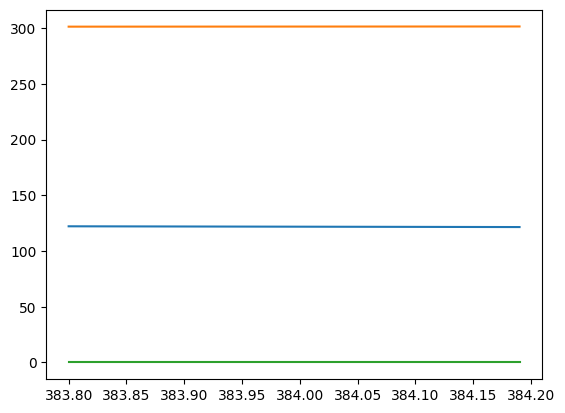

In [10]:
import matplotlib.pyplot as plt
import numpy as np


sol=list(map(list, zip(*Sol1)))

xpoints = a
ypoints0 = np.array(sol[0])
ypoints1 = np.array(sol[1])
ypoints2 = np.array(sol[2])


plt.plot(xpoints, ypoints0)
plt.plot(xpoints, ypoints1)
plt.plot(xpoints, ypoints2)

#plt.ylim(0,400)
#plt.xlim(0,600)
plt.show()

In [11]:
F = ypoints2
np.vstack((a[1:-1], F[:-2]+ (-2)* F[1:-1] + F[2:])).T

array([[ 3.83810000e+02, -5.29492527e-23],
       [ 3.83820000e+02,  2.64762420e-23],
       [ 3.83830000e+02, -3.13020007e-27],
       [ 3.83840000e+02,  1.41370185e-27],
       [ 3.83850000e+02,  3.30963109e-24],
       [ 3.83860000e+02, -6.61906042e-24],
       [ 3.83870000e+02,  3.30953024e-24],
       [ 3.83880000e+02,  2.90805684e-26],
       [ 3.83890000e+02, -5.81611368e-26],
       [ 3.83900000e+02,  2.90805684e-26],
       [ 3.83910000e+02,  6.46234854e-27],
       [ 3.83920000e+02, -1.29246971e-26],
       [ 3.83930000e+02,  1.05885581e-22],
       [ 3.83940000e+02, -2.11758237e-22],
       [ 3.83950000e+02,  1.06706299e-22],
       [ 3.83960000e+02, -1.65113005e-24],
       [ 3.83970000e+02,  8.20718264e-25],
       [ 3.83980000e+02,  3.23117427e-27],
       [ 3.83990000e+02,  0.00000000e+00],
       [ 3.84000000e+02,  0.00000000e+00],
       [ 3.84010000e+02,  6.46234854e-27],
       [ 3.84020000e+02,  8.14249453e-25],
       [ 3.84030000e+02, -1.64788595e-24],
       [ 3.

In [12]:
def Pressure(T,mu):
    x = Pot_Sol(T,mu).x
    return -Potential(x, T, mu)


def EntrodyDensity(T,mu):
    h = 0.5
    return ( -3*Pressure(T, mu) + 4*Pressure(T, mu + h) - Pressure(T, mu + 2*h) )  / (2*h)

def EnergyDensity(T, mu):
    return - Pressure(T,mu) + Pressure(0,0) + mu*EntrodyDensity(T,mu)

In [13]:

Gv = 0.001*Gs
Gd = 0.001*Gs

pressq2=[]

eng=[]
d_mu = 1

ND_Integral_Bound = Lamba_CutOff

for i in np.arange(0, 700, 5):

    s0 = Pressure(0,i)
    pressq2.append(s0)


    s1 = EnergyDensity(0,i)
    eng.append(s1)

    print(i)

0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330


KeyboardInterrupt: 

In [ ]:

Gv = 0.01*Gs
i = 300
0.5*(Pressure(i,0) - 2*Pressure(i,d_mu) + Pressure(i,2*d_mu))/d_mu**2/i**2

np.float64(0.9820500247107612)

In [ ]:
a = np.array(eng)

a[a<1e-2] = 00

a

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

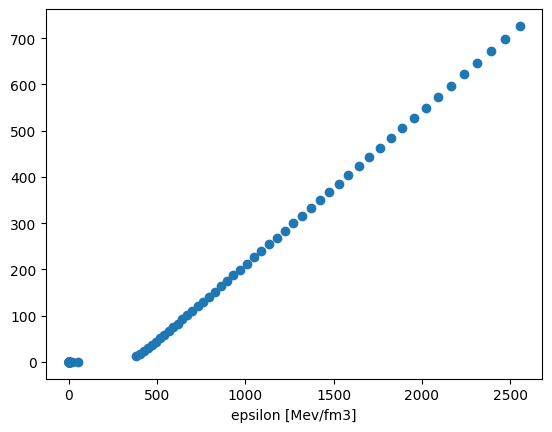

In [ ]:
xpoints = np.delete(np.arange(0, 700, 5)[0:120],[70])

#plt.plot(xpoints, (np.delete(a[0:120],[70]))/(197.7)**3)

plt.plot( (np.delete(a[0:120],[70]))/(197.7)**3 , (np.delete(np.array(pressq2)[0:120],[70]) - np.array(pressq2)[0])/(197.7)**3, marker='o', linestyle='None' )



#plt.plot( xpoints , (np.delete(np.array(pressq2)[0:120],[70]) - np.array(pressq2)[0])/(197.7)**3, label="pressure")

#plt.plot( xpoints, (np.delete(np.array(eng)[0:120],[70]))/(197.7)**3, label="energy")

#
plt.xlabel("epsilon [Mev/fm3]")


#plt.ylabel("quark pressure [Mev/fm3]")

plt.show()

In [ ]:
import pandas as pd

dict = {'quark energy [Mev/fm3]': (np.delete(a[0:120],[70]))/(197.7)**3 ,
         'quark pressure [Mev/fm3]': (np.delete(np.array(pressq2)[0:120],[70]) - np.array(pressq2)[0])/(197.7)**3}
    
df = pd.DataFrame(dict)


df.to_csv('Press_v_Energy_Tzero.csv', index=False)

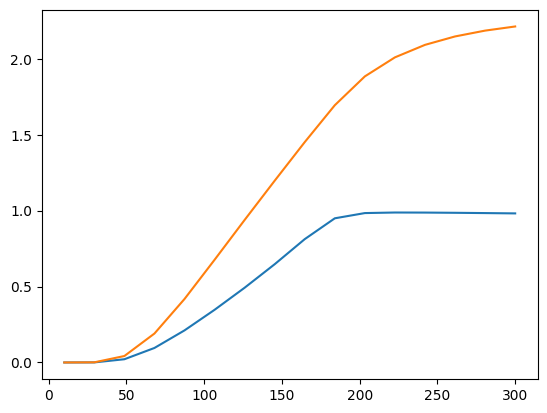

In [ ]:
xpoints = T

#plt.plot(xpoints, (ypoints1 + ypoints3)/T**4)

plt.plot(xpoints, 0.5*(np.array(chiq2))/T**2)

plt.plot(xpoints, (np.array(pressq2) - 28023056056.734028)/T**4)

#plt.plot(xpoints, (np.array(pressq0) - pressq0[0])/T**4)




plt.show()

### Meson Bound State

In [1]:
import TMQGP

In [5]:
ND_Integral_Bound = Lamba_CutOff
diquarkexists = False

In [ ]:
diquarkexists = False

In [6]:

a = np.arange(-2000, 2000, 1)
Pop2=[]
Pop1=[]

T = 500
mu = 0
x = Pot_Sol(T,mu).x
x0 = Pot_Sol(0,0).x
q = 150



for i in a:
    s1 = TMQGP.ImPi_Diquark(float(i),q,T,1,float(x[0]),-float(x[1]),float(x[2]),1)
    Pop1.append(s1)
    s2 = TMQGP.ImPi_AntiDiquark(float(i),q,T,1,float(x[0]),float(x[1]),float(x[2]),1)
    Pop2.append(s2)
    #print(s)

In [133]:
T = 500
mu = 10
x = Pot_Sol(T,mu).x

TMQGP.ImPi_Pion(float(i),q,0,1,float(x0[0]),float(x0[1]),float(x0[2]),1)

0.0

In [10]:

a = np.arange(-5000, 5000, 1)
Pop2=[]
Pop1=[]

T = 500
mu = 0
x = Pot_Sol(T,mu).x
x0 = Pot_Sol(0,0).x
q = 0



for i in a:
    s1 = TMQGP.ImPi_Pion(float(i),q,T,1,float(x[0]),float(x[1]),float(x[2]),1)
    Pop1.append(s1)
    s2 = TMQGP.ImPi_Pion(float(i),q,0,1,float(x0[0]),float(x0[1]),float(x0[2]),0)*np.heaviside(4*Lamba_CutOff**2 + x[0]**2 - i**2,0.5) + TMQGP.ImPi_Pion(float(i),q,T,1,float(x[0]),float(x[1]),float(x[2]),0) - TMQGP.ImPi_Pion(float(i),q,0,1,float(x0[0]),float(x0[1]),float(x0[2]),0)
    Pop2.append(s2)

    #print(s)

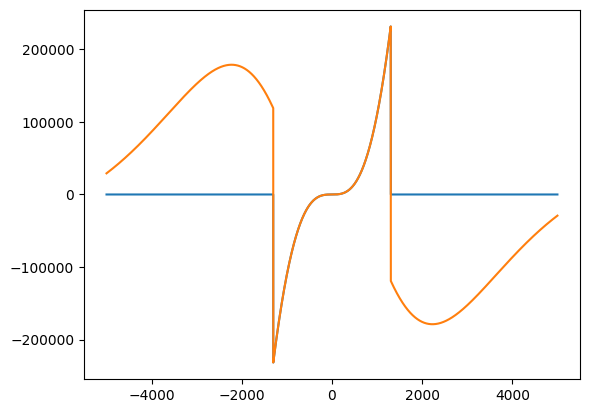

In [11]:


xpoints = a
ypoints1 = np.array(Pop1)
#ypoints2 = np.array(Pop2)
#ypoints3 = np.array(Pop3)

#plt.plot(xpoints, np.array(Pop1)-np.array(Pop2))


#plt.plot(xpoints, np.array(Pop1))

#plt.plot(xpoints, np.array(Pop2))

plt.plot(xpoints, np.array(Pop1))

plt.plot(xpoints, np.array(Pop2))


#plt.plot(xpoints, np.array(Pop1) - np.array(Pop2))


#plt.plot(xpoints, np.array(Pop2)*1.5)





# plt.vlines(x=sqrt(4*Lamba_CutOff**2 + 4*x[0]**2 +  q**2 ) - 2*x[1],ymax=2e5,ymin=-1e5 , colors="red")


# plt.vlines(x=-sqrt(4*Lamba_CutOff**2 + 4*x[0]**2 +  q**2 ) - 2*x[1],ymax=2e5,ymin=-1e5 , colors="red")



#plt.plot(xpoints, ypoints2)
#plt.plot(xpoints, ypoints3)
#plt.axvline(0)
#plt.axhline(0)


plt.show()




In [ ]:
import scipy.optimize


T = 0
mu = 0
x = Pot_Sol(T,mu).x
Gd = 1.3*Gs
q = 0
scipy.optimize.minimize(lambda b: (1-2*Gd*TMQGP.RePi_Diquark(float(b),q,T,mu,float(x[0]),float(x[1]),float(x[2]),float(x0[0]),float(x0[1]),float(x0[2]),1))**2,600).x

/tmp/ipykernel_54685/336691742.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scipy.optimize.minimize(lambda b: (1-2*Gd*TMQGP.RePi_Diquark(float(b),q,T,mu,float(x[0]),float(x[1]),float(x[2]),float(x0[0]),float(x0[1]),float(x0[2]),1))**2,600).x


array([413.21899052])

In [14]:
T = 0
mu = 0
x = Pot_Sol(T,mu).x

1-2*Gs*TMQGP.RePi_Pion(140,10,T,mu,float(x[0]),float(x[1]),float(x[2]),float(x0[0]),float(x0[1]),float(x0[2]),1)

0.00015478192627726983

In [139]:
Gd = 1.5*Gs
T,mu = 0,0
x = Pot_Sol(T,mu).x
x0 = Pot_Sol(0,0).x


1-2*Gd*TMQGP.RePi_Diquark(140,0,T,mu,float(x[0]),float(x[1]),float(x[2]),float(x0[0]),float(x0[1]),float(x0[2]),1)

6.715652202260447e-05

In [64]:

a = np.arange(-2000, 2000, 5)
Pop=[]
PopA=[]
PopB=[]

T = 180
mu = 0
x = Pot_Sol(T,mu).x
x0 = Pot_Sol(0,0).x
q = 0
for i in a:
    s1 = TMQGP.RePi_Diquark(float(i),q,T,mu,float(x[0]),float(x[1]),float(x[2]),float(x0[0]),float(x0[1]),float(x0[2]),0)
    s2 = TMQGP.RePi_Diquark(float(i),q,T,mu,float(x[0]),float(x[1]),float(x[2]),float(x0[0]),float(x0[1]),float(x0[2]),1)
    PopA.append(s1)
    PopB.append(s2)
    # #print(s)

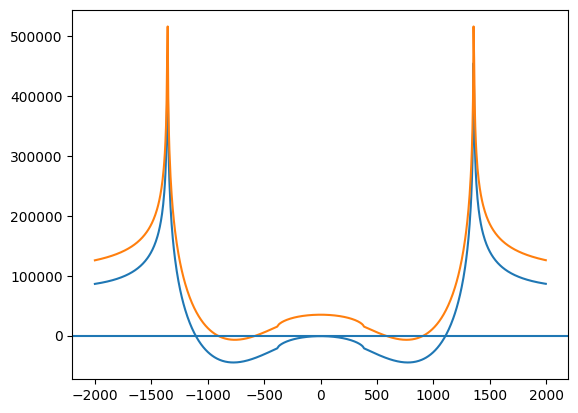

In [77]:

xpoints = a
ypoints1 = np.array(Pop)
#ypoints2 = np.array(Pop2)
#ypoints3 = np.array(Pop3)

#plt.yscale("log")

plt.plot(xpoints,1/(2*Gs) - np.array(PopA))

plt.plot(xpoints,1/(2*Gs) - np.array(PopB))

# plt.plot(xpoints, 1/(2*Gs) - np.array(Pop2))



#plt.plot(xpoints, ypoints2)
#plt.plot(xpoints, ypoints3)
#plt.axvline(0)
plt.axhline(0)


plt.show()


In [ ]:
T = 200
x = Pot_Sol(T,0).x
x0 = Pot_Sol(0,0).x

E = 1e3

TMQGP.phaseshift_Diquark(Gd,0,0,0,0,x[0],x[1],x[2],x0[0],x0[1],x0[2],"651")

TypeError: in method 'phaseshift_Diquark', argument 12 of type 'double'

In [61]:

z = 100

T = 30
mu = 0

x = Pot_Sol(T,mu).x
m , mu_star, Delta = x

I1 = (4*pi)/((2*pi)**3) * (scipy.integrate.quad( lambda p: p**2  * (1/(Ep(p,m)+mu_star)) ,0, Lamba_CutOff, limit = 20000)[0] + scipy.integrate.quad( lambda p: p**2  * (1/(Ep(p,m)+mu_star)) * (  -2*exp(-(Ep(p,m) + mu_star)/T)/(1 + exp(-(Ep(p,m) + mu_star)/T)) ),0, ND_Integral_Bound, limit= 200000)[0] )
I1 += (4*pi)/((2*pi)**3) * (scipy.integrate.quad( lambda p: p**2  * (1/(Ep(p,m)-mu_star)) ,0, Lamba_CutOff, limit = 20000)[0] + scipy.integrate.quad( lambda p: p**2  * (1/(Ep(p,m)-mu_star)) * (  -2*exp(-(Ep(p,m) - mu_star)/T)/(1 + exp(-(Ep(p,m) - mu_star)/T)) ),0, ND_Integral_Bound, limit= 200000)[0] )


I11 = (4*pi)/(2*pi)**3 * scipy.integrate.quad(lambda p : p**2 * (1/(z**2 - 4*(Ep(p,m)+mu_star)**2) ), 0, Lamba_CutOff, limit = 20000 )[0]     +     (4*pi)/(2*pi)**3 * scipy.integrate.quad(lambda p : p**2 * (-2*exp(-(Ep(p,m)+mu_star)/T)/(1 + exp(-(Ep(p,m)+mu_star)/T)))/(z**2 - 4*(Ep(p,m)+mu_star)**2), 0, ND_Integral_Bound , limit= 200000)[0]
I11 += -(4*pi)/(2*pi)**3 * scipy.integrate.quad(lambda p : p**2 * (1/(z**2 - 4*(Ep(p,m)-mu_star)**2) ), 0, Lamba_CutOff , limit = 20000)[0]   -     (4*pi)/(2*pi)**3 * scipy.integrate.quad(lambda p : p**2 * (-2*exp(-(Ep(p,m)-mu_star)/T)/(1 + exp(-(Ep(p,m)-mu_star)/T)))/(z**2 - 4*(Ep(p,m)-mu_star)**2), 0, ND_Integral_Bound , limit= 200000)[0]

I0 = (4*pi)/(2*pi)**3 * scipy.integrate.quad(lambda p : p**2 * (1/((Ep(p,m)+mu_star)*(z**2 - 4*(Ep(p,m)+mu_star)**2)) ), 0, Lamba_CutOff , limit = 20000)[0] + (4*pi)/(2*pi)**3 * scipy.integrate.quad(lambda p : p**2 * (-2*exp(-(Ep(p,m)+mu_star)/T)/(1 + exp(-(Ep(p,m)+mu_star)/T))/((Ep(p,m)+mu_star)*(z**2 - 4*(Ep(p,m)+mu_star)**2)) ), 0, ND_Integral_Bound, limit= 200000 )[0]
I0 += (4*pi)/(2*pi)**3 * scipy.integrate.quad(lambda p : p**2 * (1/((Ep(p,m)-mu_star)*(z**2 - 4*(Ep(p,m)-mu_star)**2)) ), 0, Lamba_CutOff , limit = 20000)[0] + (4*pi)/(2*pi)**3 * scipy.integrate.quad(lambda p : p**2 * (-2*exp(-(Ep(p,m)-mu_star)/T)/(1 + exp(-(Ep(p,m)-mu_star)/T))/((Ep(p,m)-mu_star)*(z**2 - 4*(Ep(p,m)-mu_star)**2)) ), 0, ND_Integral_Bound, limit= 200000 )[0]

a = 2*I1 + 4*z*I11 - 2*z**2 * I0




b = 0.5*TMQGP.RePi_Diquark(z,0,T,mu,x[0],x[1],x[2],x0[0],x0[1],x0[2],0)

print(a/b)

print(x[0] - x[1])


0.9999957143394297
325.5242388546911


In [8]:
def phaseshift_Diquark(Gd,w,q,T,mu,L):

     if L == 0:
        IMP = TMQGP.ImPi_Diquark(w,q,T,mu,x[0],x[1],x[2],1)
        #  IMP = TMQGP.ImPi_Diquark(w,q,0,0,x0[0],x0[1],x0[2],L)*np.heaviside(4*Lamba_CutOff**2 + 4*x[0]**2 - w**2,0.5) + ( TMQGP.ImPi_Diquark(w,q,T,mu,x[0],x[1],x[2],L) - TMQGP.ImPi_Diquark(w,q,0,0,x0[0],x0[1],x0[2],L) )
     else:
          IMP = TMQGP.ImPi_Diquark(w,q,T,mu,x[0],x[1],x[2],L)

     reDen = 1/(2*Gd) - TMQGP.RePi_Diquark(w,q,T,mu,x[0],x[1],x[2],x0[0],x0[1],x0[2],L)
     imDen = - IMP

     phi = atan(-imDen / reDen)

     if (reDen < 0 ) and (w > 0):
          phi += pi
     if (reDen < 0 ) and (w < 0):
          phi -= pi
     
     return phi

In [11]:

Pop1=[]
Pop2=[]
T = 200
mu = 0
x0 = Pot_Sol(0,0).x
x0 = x0.astype(float)

x = Pot_Sol(T,mu).x
x = x.astype(float)

q =0


a = np.arange(-2000, 2000, 5)

for i in a:
    i = float(i)
    s1 = phaseshift_Diquark(Gd,i,q,T,mu,1)
    s2 = phaseshift_Diquark(Gd,i,q,T,mu,0)
    Pop1.append(s1)
    Pop2.append(s2)

In [67]:
ND_Integral_Bound = np.inf

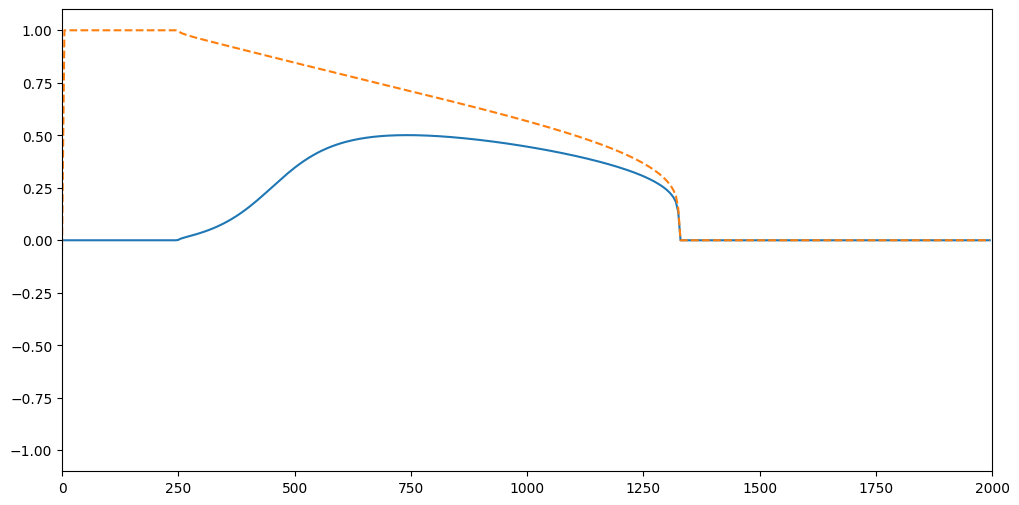

In [12]:
plt.figure(figsize=(12,6))

#ypoints1 = np.array(Pop1)



# plt.plot(a, np.array(Pop1)/(np.exp(abs(a)/T) - 1)/np.sign(a) , linestyle="-")


# plt.plot(a, np.array(Pop2)/(np.exp(abs(a)/T) - 1)/np.sign(a) , linestyle="-")




plt.plot(a, np.array(Pop1)/pi, linestyle="-")
plt.plot(a, np.array(Pop2)/pi, linestyle="--")


# plt.plot(a, 1-2*Gd*np.array(PopA), linestyle="-")
# plt.plot(a, 1-2*Gd*np.array(PopB), linestyle="--")


plt.xlim(0,2000)
plt.show()


In [111]:
ND_Integral_Bound = np.inf

In [5]:

Pop1=[]
Pop2=[]
T = 500
mu = 0
x0 = Pot_Sol(0,0).x
x0 = x0.astype(float)

x = Pot_Sol(T,mu).x
x = x.astype(float)

q =500
a = np.arange((-2e3-q+1),2e3,2)


#a = np.arange(-q - 2*x[1],q - 2*x[1],0.1)

for i in a:
    i = float(i)
    s1 = TMQGP.phaseshift_Diquark(Gd,i,q,T,mu,x[0],x[1],x[2],x0[0],x0[1],x0[2],1)
    s2 = TMQGP.phaseshift_Diquark(Gd,i,q,T,mu,x[0],x[1],x[2],x0[0],x0[1],x0[2],0)
    Pop1.append(s1)
    Pop2.append(s2)


In [ ]:
x

array([7.59646084, 0.        , 0.        ])

In [17]:
ND_Integral_Bound = Lamba_CutOff

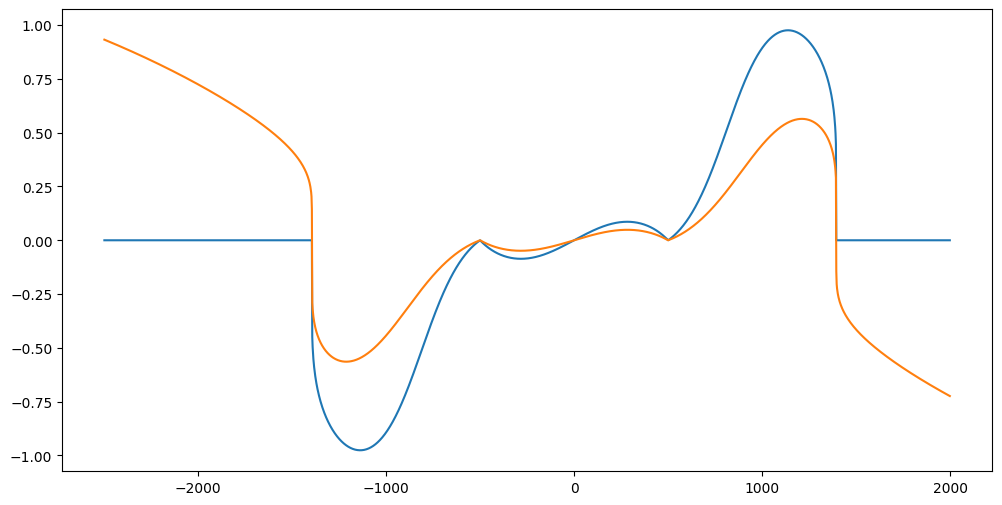

In [6]:
plt.figure(figsize=(12,6))

#ypoints1 = np.array(Pop1)



# plt.plot(a, np.array(Pop1)/(np.exp(abs(a)/T) - 1)/np.sign(a) , linestyle="-")


# plt.plot(a, np.array(Pop2)/(np.exp(abs(a)/T) - 1)/np.sign(a) , linestyle="-")




plt.plot(a, np.array(Pop1), linestyle="-")


plt.plot(a, np.array(Pop2), linestyle="-")

#plt.plot(a, np.array(Pop2), linestyle="-")




#plt.plot(xpoints, -np.array(Pop2)[::-1], linestyle="-")

#plt.plot(xpoints, -np.array(Pop2), linestyle="-")



# plt.vlines(x=(sqrt(4*Lamba_CutOff**2 + 4*x[0]**2 + q**2) - 2*x[1]),ymin=-pi,ymax=pi, color="red"




# plt.vlines(q - 2*x[1],ymin=-pi,ymax=1.5*pi)

# plt.vlines(-q - 2*x[1],ymin=-pi,ymax=1.5*pi)


# plt.vlines((sqrt(0*Lamba_CutOff**2 + 4*x[0]**2 + q**2) - 2*x[1]),ymin=-pi,ymax=1.5*pi)

#plt.axhline(0)
# for x in np.arange(-2e3 - q,2e3 + q,50):
#     plt.axvline(x=x, color='g', linestyle=':', label=f'VLine at {x}')

plt.show()


In [ ]:
Pop1

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [25]:
Pop1/(np.sign(a) * (np.exp(abs(np.array(a))/T)-1)) 


array([-0., -0., -0., ...,  0.,  0.,  0.], shape=(56000,))

In [93]:
scipy.integrate.simpson(np.array(Pop1)/(np.sign(a) * (np.exp(abs(np.array(a))/T)-1)), a)

np.float64(224.49357215078044)

In [94]:
scipy.integrate.simpson(np.array(Pop2)/(np.sign(a) * (np.exp(abs(np.array(a))/T)-1)), a)

np.float64(224.49357177265395)

In [ ]:
(sqrt(4*Lamba_CutOff + 4*x[0]**2 + q**2) - 2*x[1])

np.float64(35.022830096325016)

In [ ]:
import scipy.integrate


z = 100
ND_Integral_Bound = np.inf
T = 50
mu = 100

m , mu_star, Delta = Pot_Sol(T,mu).x
x = Pot_Sol(T,mu).x

I1 = (4*pi)/((2*pi)**3) * (scipy.integrate.quad( lambda p: p**2  * (1/(Ep(p,m)+mu_star)) ,0, Lamba_CutOff, limit = 2000)[0] + scipy.integrate.quad( lambda p: p**2  * (1/(Ep(p,m)+mu_star)) * (  -2*exp(-(Ep(p,m) + mu_star)/T)/(1 + exp(-(Ep(p,m) + mu_star)/T)) ),0, ND_Integral_Bound, limit= 200000)[0] )
I1 += (4*pi)/((2*pi)**3) * (scipy.integrate.quad( lambda p: p**2  * (1/(Ep(p,m)-mu_star)) ,0, Lamba_CutOff, limit = 2000)[0] + scipy.integrate.quad( lambda p: p**2  * (1/(Ep(p,m)-mu_star)) * (  -2*exp(-(Ep(p,m) - mu_star)/T)/(1 + exp(-(Ep(p,m) - mu_star)/T)) ),0, ND_Integral_Bound, limit= 200000)[0] )


I11 = (4*pi)/(2*pi)**3 * scipy.integrate.quad(lambda p : p**2 * (1/(z**2 - 4*(Ep(p,m)+mu_star)**2) ), 0, Lamba_CutOff )[0]     +     (4*pi)/(2*pi)**3 * scipy.integrate.quad(lambda p : p**2 * (-2*exp(-(Ep(p,m)+mu_star)/T)/(1 + exp(-(Ep(p,m)+mu_star)/T)))/(z**2 - 4*(Ep(p,m)+mu_star)**2), 0, ND_Integral_Bound )[0]
I11 += -(4*pi)/(2*pi)**3 * scipy.integrate.quad(lambda p : p**2 * (1/(z**2 - 4*(Ep(p,m)-mu_star)**2) ), 0, Lamba_CutOff )[0]   -     (4*pi)/(2*pi)**3 * scipy.integrate.quad(lambda p : p**2 * (-2*exp(-(Ep(p,m)-mu_star)/T)/(1 + exp(-(Ep(p,m)-mu_star)/T)))/(z**2 - 4*(Ep(p,m)-mu_star)**2), 0, ND_Integral_Bound )[0]

I0 = (4*pi)/(2*pi)**3 * scipy.integrate.quad(lambda p : p**2 * (1/((Ep(p,m)+mu_star)*(z**2 - 4*(Ep(p,m)+mu_star)**2)) ), 0, Lamba_CutOff )[0] + (4*pi)/(2*pi)**3 * scipy.integrate.quad(lambda p : p**2 * (-2*exp(-(Ep(p,m)+mu_star)/T)/(1 + exp(-(Ep(p,m)+mu_star)/T))/((Ep(p,m)+mu_star)*(z**2 - 4*(Ep(p,m)+mu_star)**2)) ), 0, ND_Integral_Bound, limit= 200000 )[0]
I0 += (4*pi)/(2*pi)**3 * scipy.integrate.quad(lambda p : p**2 * (1/((Ep(p,m)-mu_star)*(z**2 - 4*(Ep(p,m)-mu_star)**2)) ), 0, Lamba_CutOff )[0] + (4*pi)/(2*pi)**3 * scipy.integrate.quad(lambda p : p**2 * (-2*exp(-(Ep(p,m)-mu_star)/T)/(1 + exp(-(Ep(p,m)-mu_star)/T))/((Ep(p,m)-mu_star)*(z**2 - 4*(Ep(p,m)-mu_star)**2)) ), 0, ND_Integral_Bound, limit= 200000 )[0]

a = 2*(2*I1 + 4*z*I11 - 2*z**2 * I0)



I1 = (4*pi)/((2*pi)**3) * (scipy.integrate.quad( lambda p: p**2  * (1/(Ep(p,m)+mu_star)) ,0, Lamba_CutOff, limit = 2000)[0] + scipy.integrate.quad( lambda p: p**2  * (1/(Ep(p,m)+mu_star)) * (  -2*exp(-(Ep(p,m) + mu_star)/T)/(1 + exp(-(Ep(p,m) + mu_star)/T)) ),0, ND_Integral_Bound, limit= 200000)[0] )
I1 += (4*pi)/((2*pi)**3) * (scipy.integrate.quad( lambda p: p**2  * (1/(Ep(p,m)-mu_star)) ,0, Lamba_CutOff, limit = 2000)[0] + scipy.integrate.quad( lambda p: p**2  * (1/(Ep(p,m)-mu_star)) * (  -2*exp(-(Ep(p,m) - mu_star)/T)/(1 + exp(-(Ep(p,m) - mu_star)/T)) ),0, ND_Integral_Bound, limit= 200000)[0] )



x0 = Pot_Sol(0,0).x



def Re(w,q,T,mu,x,x0):

    l1 = lambda s: TMQGP.ImPi_Diquark(s - 0*x[1],q,0,0,float(x[0]),float(x[1]),float(x[2]),0)
    l2 = lambda s: TMQGP.ImPi_Diquark(s - 2*x[1],q,T,1,float(x[0]),float(x[1]),float(x[2]),0)
    l3 = lambda s: TMQGP.ImPi_Diquark(s,q,T,1,float(x[0]),float(x[1]),float(x[2]),0)
    
    P = (1/pi)*scipy.integrate.quad( l1 , -sqrt(4*Lamba_CutOff**2 + 4*x[0]**2 + q**2), sqrt(4*Lamba_CutOff**2 + 4*x[0]**2 + q**2), weight='cauchy', wvar=w + 2*x[1], limit= 10000)[0]
    P -= (1/pi)*scipy.integrate.quad( l1 , -2e4, 2e4, weight='cauchy', wvar=w + 2*x[1], limit= 10000)[0]
    P += 1*(1/pi)*scipy.integrate.quad( l2 , -2e4, 2e4, weight='cauchy', wvar=w + 2*x[1], limit= 10000)[0]
    return P


b = Re(z,0,T,mu,x,x0)


a/b

0.9999999995921239

In [ ]:
TMQGP.ImPi_Diquark(1400,0,T,1,float(x[0]),float(x[1]),float(x[2]),1)

283966.66005470953

In [ ]:
Pop2

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

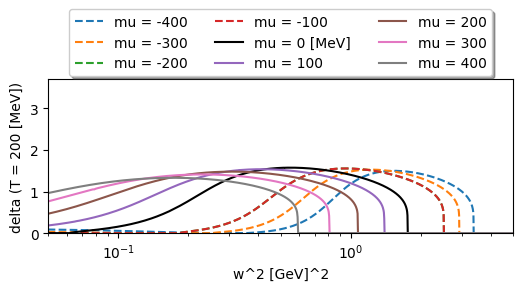

In [ ]:
plt.figure(figsize=(6,2))

xpoints = (a**2)/1e6
#ypoints1 = np.array(Pop1)
ypoints1 = np.array(T0)


plt.plot(xpoints, np.array(T0_m400), linestyle="dashed")
plt.plot(xpoints, np.array(T0_m300), linestyle="dashed")
plt.plot(xpoints, np.array(T0_m200), linestyle="dashed")
plt.plot(xpoints, np.array(T0_m100), linestyle="dashed")
plt.plot(xpoints, np.array(T0), color="black")
plt.plot(xpoints, np.array(T0_100))
plt.plot(xpoints, np.array(T0_200))
plt.plot(xpoints, np.array(T0_300))
plt.plot(xpoints, np.array(T0_400))
#plt.plot(xpoints, ypoints2)
#plt.plot(xpoints, ypoints1)

plt.ylim(0,3.7)
plt.xlim(0.05,5)

plt.xscale("log")


plt.legend(['mu = -400', 'mu = -300','mu = -200','mu = -100','mu = 0 [MeV]'
            ,'mu = 100','mu = 200','mu = 300','mu = 400'],loc='upper center',
              bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)

# single vline with specific ymin and ymax
# plt.vlines(x=min_x(q, x[0], x[1]), ymin=-pi, ymax=pi, colors='green', ls=':', lw=2, label='vline_single - partial height')

plt.xlabel("w^2 [GeV]^2")

plt.ylabel("delta (T = 200 [MeV])")

plt.show()


In [ ]:


x0 = Pot_Sol(0,0).x
x0 = x0.astype(float)

x = Pot_Sol(T,mu).x
x = x.astype(float)

Test = []
xp = np.linspace(0,5e3,16).tolist()
for i in xp:

    s = i*i*TMQGP.Pressure_Integrand_Diquark(Gd,i,T,mu,x[0],x[1],x[2],x0[0],x0[1],x0[2],1)
    Test.append(s)
    print(i)

0.0
333.3333333333333
666.6666666666666
1000.0
1333.3333333333333
1666.6666666666665
2000.0
2333.333333333333
2666.6666666666665
3000.0
3333.333333333333
3666.6666666666665
4000.0
4333.333333333333
4666.666666666666
5000.0


In [ ]:
Test

[0.0,
 8094.07613325281,
 53.95560532993994,
 0.1688242646588145,
 0.0003353239590782763,
 8.602973897527731e-07,
 1.342769106057417e-09,
 2.5119927995943294e-12,
 3.77149552410962e-15,
 6.4218993913577394e-18,
 1.1158841888539132e-20,
 1.568155432446173e-23,
 2.2138544852019738e-26,
 3.2187426003417683e-29,
 4.757925576631553e-32,
 7.951711256299366e-35]

In [32]:


def w_Vac(q,T,mu_x,m):
    return -T*log( 1 - exp( (mu_x - sqrt(m**2 + q**2))/T ) )

def Pressure_Exci(T,mu_x,m,d_x):
    return d_x *(4*pi/(2*pi)**3) * scipy.integrate.quad(lambda q: q**2 * w_Vac(q,T,mu_x,m), 0, np.inf)[0]

Gv = 1*Gs
Gd = 0.9*Gs

T = 180
mu = 0

x0 = Pot_Sol(0,0).x
x0 = x0.astype(float)

x = Pot_Sol(T,mu).x
x = x.astype(float)

xp = np.linspace(20,1.5e3,56).tolist()
W=[]
for i in xp:
    #p1 = Pressure_Exci(i,0,140,3) - Pressure_Exci(0.1,0,140,3)
    p2 = w_Vac(i,T,0,800)
    #PressPion.append(p1)
    W.append(p2)




p1 = pipe(xp) | p[lambda i: TMQGP.Pressure_Integrand_Diquark_QP(Gd,i,T,mu,x[0],x[1],x[2],x0[0],x0[1],x0[2],1)]*(16//1) | END



In [8]:

TMQGP.Pressure_Integrand_Diquark_LD(Gd,100,T,mu,x[0],x[1],x[2],x0[0],x0[1],x0[2],1)

0.0

In [6]:
p1

[491.2074964005019,
 488.47788567558945,
 484.00933874393354,
 478.0474262073319,
 471.0424606830464,
 463.32819116204865,
 455.16128560082785,
 446.7305956190816,
 438.17227071221635,
 429.5835000894644,
 421.0342385089251,
 412.57344556171375,
 404.2364235124998,
 396.0479310107792,
 388.02515483626183,
 380.17970006486405,
 372.52231911891346,
 365.0474412691293,
 357.76696939910323,
 350.677826538287,
 343.7788906804125,
 337.06803276839383,
 330.5423465852691,
 324.1983657586829,
 318.03221066137263,
 312.03969509709634,
 306.2164279077441,
 300.55788105441343,
 295.0594503252484,
 289.71650004492255,
 284.52441309970976,
 279.4786003809793,
 274.57452935559223,
 269.8077343473561,
 265.17384316093467,
 260.6685870155478,
 256.2877979093021,
 252.02739759411165,
 247.88345684417226,
 243.85214038118437,
 239.92972789963133,
 236.11261586513413,
 232.39733830628472,
 228.78048285897796,
 225.25887987494744,
 221.82930725506623,
 218.48874710371535,
 215.2342896066662,
 212.06308711

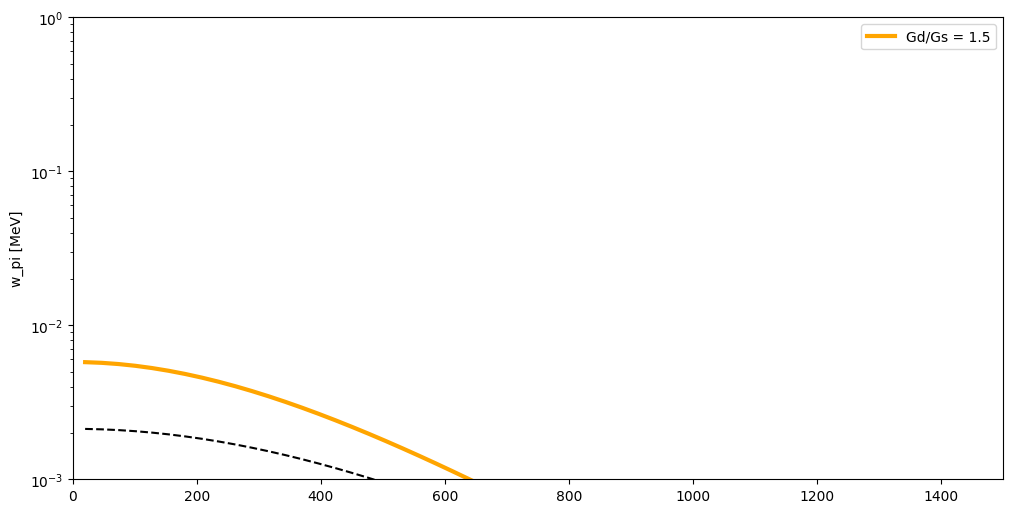

In [33]:
plt.figure(figsize=(12,6))

xpoints = xp



plt.plot(xpoints, np.array(p1)/1000, linestyle="-",color="orange", linewidth = 3, label="Gd/Gs = 1.5")
plt.plot(xpoints, np.array(W)/1000, linestyle="--",color="black")

#plt.plot(xpoints, np.array(Test), linestyle="--",color="black")

plt.yscale("log")
plt.xlim(0,1.5e3)


#plt.xlabel("q [MeV]")
plt.ylabel("w_pi [MeV]")


#plt.vlines(Lamba_CutOff,0,1)

plt.ylim(1e-3,1)

plt.legend()
plt.show()


In [15]:
xpoints

[200.0, 225.0, 250.0, 275.0, 300.0, 325.0, 350.0, 375.0, 400.0]

In [19]:
import scipy.integrate as it

(3/pi/pi/2)*it.simpson(np.array(p1)*np.array(xpoints)**2,xpoints)/T**4


np.float64(19.764278757641033)

In [150]:
import scipy.integrate as it

(3/pi/pi/2)*it.simpson(np.array(p1)*np.array(xpoints)**2,xpoints)/T**4

np.float64(0.4567467071741749)

In [133]:
6/8

0.75

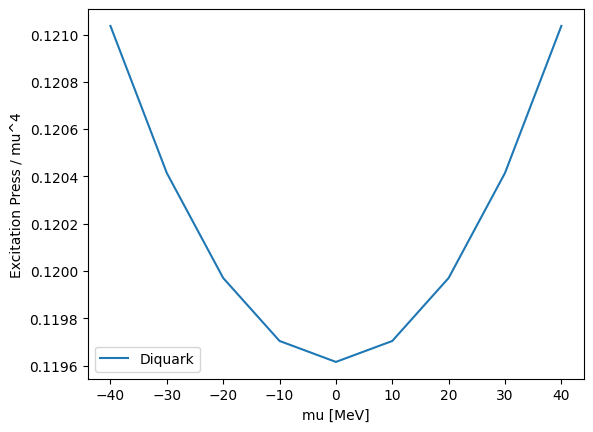

In [ ]:
xpoints = mu
ypoints1 = np.array(press)
ypoints3 = np.array(pressa)

plt.plot(xpoints, (ypoints1 + ypoints3)/T**4)

#plt.plot(xpoints, (ypoints1)/T**4)
#plt.plot(xpoints, (ypoints3)/T**4)
#plt.plot(xpoints, (ypoints1)/T**4)
#plt.plot(xpoints, (ypoints3)/T**4)
#plt.plot(xpoints, (ypoints1)/T**4)
#plt.plot(xpoints, (ypoints1[::-1])/T**4)

#plt.plot(xpoints, (ypoints1+ypoints1[::-1])/T**4)
#plt.plot(xpoints, (np.array(pressq)-28023056056.734028)/mu**4)

plt.legend(['Diquark', 'Anti-Diquark', 'Total Diquark', 'quark'])

plt.xlabel('mu [MeV]')



plt.ylabel('Excitation Press / mu^4')

plt.show()

In [ ]:
T = 200
mu = 0

x0 = Pot_Sol(0,0).x
x0 = x0.astype(float)

x = Pot_Sol(T,mu).x
x = x.astype(float)

TMQGP.pressure_diquark(Gd,T,mu,x[0],x[1],x[2],x0[0],x0[1],x0[2],1)

117704833.36222254

In [ ]:
T = 200
mu = 0

x0 = Pot_Sol(0,0).x
x0 = x0.astype(float)

x = Pot_Sol(T,mu).x
x = x.astype(float)

TMQGP.pressure_diquark_Test(Gd,T,mu,x[0],x[1],x[2],x0[0],x0[1],x0[2],1)

235407042.37542012

In [12]:
def M1(T,mu):
    x = Pot_Sol(T,mu).x
    x = x.astype(float)
    return TMQGP.pressure_diquark_Test(Gd,T,mu,x[0],x[1],x[2],x0[0],x0[1],x0[2],1)


In [6]:

x0 = Pot_Sol(0,0).x
x0 = x0.astype(float)

Pot_Sol(250,0).x

M1(250,0)

AttributeError: module 'TMQGP' has no attribute 'pressure_diquark_Test'

In [ ]:
Gv = 2*Gs
Gd = 1.5*Gs

T = 200
x0 = Pot_Sol(0,0).x
xp = [-50,-40,-30,-20,-10,0,10,20,30,40,50]
p1 = pipe(xp) | p[lambda x: M1(T,x)]*(16//1) | END

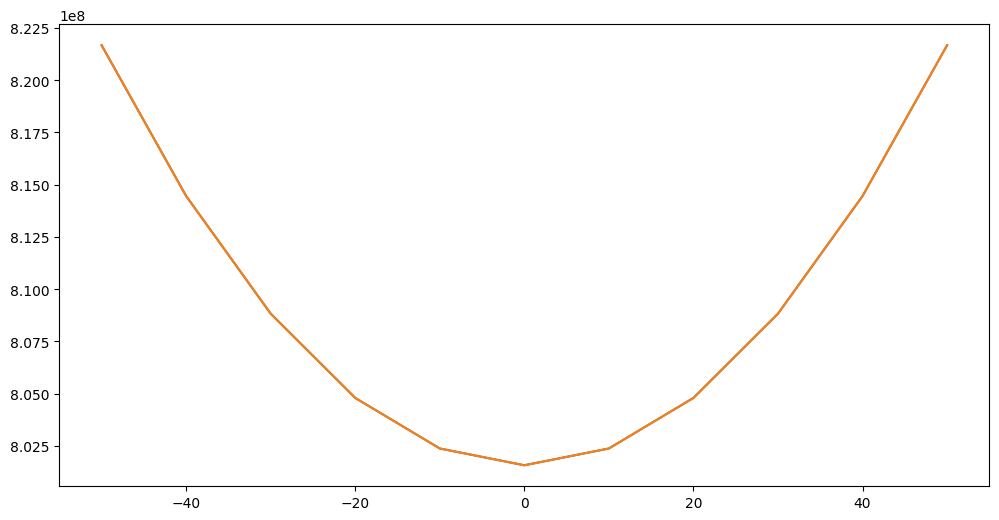

In [ ]:
plt.figure(figsize=(12,6))

xpoints = xp

plt.plot(xpoints, np.array(p1), linestyle="-")

plt.plot(xpoints, np.array(p1)[::-1], linestyle="-")


plt.show()

In [ ]:
np.array(p1)/T**4

array([0.51354573, 0.50903655, 0.5055195 , 0.50299969, 0.50148817,
       0.500986  , 0.50148817, 0.50299969, 0.5055195 , 0.50903655,
       0.51354573])

In [ ]:

from syntax_sugar import *

Gd = 1*Gs

Gv = 1*Gs

ND_Integral_Bound=Lamba_CutOff

T = 85

x0 = Pot_Sol(0,0).x

xp = np.linspace(0,300,16).tolist() + np.linspace(320,400,16).tolist()
p1 = pipe(xp) | p[lambda x: M1(T,x)]*(16//1) | END

[WARNING] GSL integration failed in pressure_diquark_Test:
    status = exceeded max number of iterations
    result = 5.09275e+08, error = 1.2685e+07
    parameters:  Gd=5.04e-06 T=85 mu=400 m=96.3516 mu*=308.378 delta=0 thermal_cutoff=1 Nf=2 Lambda=651
[WARNING] GSL integration failed in pressure_diquark_Test:
    status = exceeded max number of iterations
    result = 3.84952e+08, error = 4.9814e+06
    parameters:  Gd=5.04e-06 T=85 mu=389.333 m=112.729 mu*=303.596 delta=0 thermal_cutoff=1 Nf=2 Lambda=651
[WARNING] GSL integration failed in pressure_diquark_Test:
    status = exceeded max number of iterations
    result = 4.43821e+08, error = 8.28155e+06
    parameters:  Gd=5.04e-06 T=85 mu=394.667 m=104.21 mu*=305.935 delta=1.26218e-32 thermal_cutoff=1 Nf=2 Lambda=651


In [ ]:
diquarkexists

False

In [ ]:
PD85 = p1

In [ ]:
Pressure(0,0)

np.float64(28023056056.734028)

Text(0, 0.5, 'Diaquark Pressure [MeV/fm^3]')

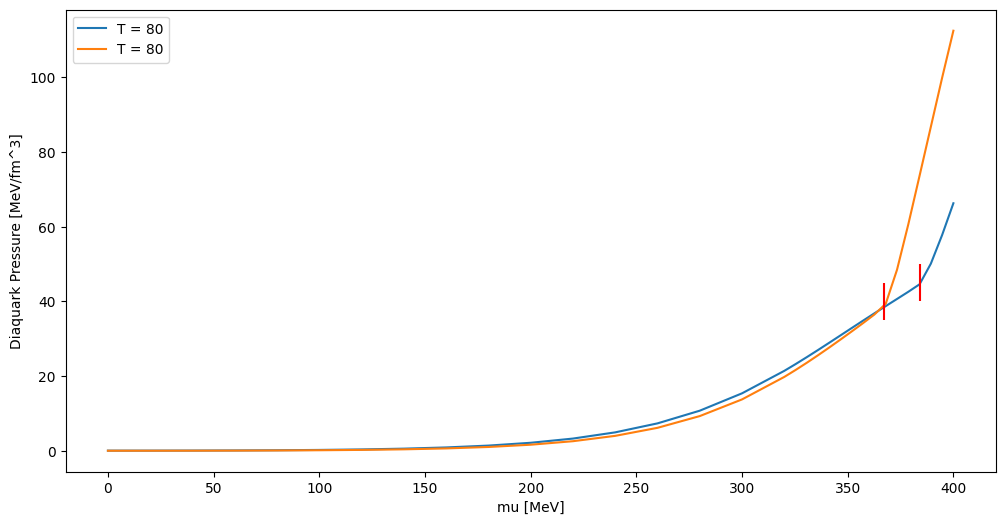

In [ ]:

plt.figure(figsize=(12,6))

xpoints = xp


plt.plot(xpoints, (np.array(PD85))/(197.3)**3,label = "T = 80")

plt.vlines(x=384.03,ymax=50,ymin=40 , colors="red")


plt.plot(xpoints, (np.array(PD80))/(197.3)**3,label = "T = 80")

plt.vlines(x=367.11,ymax=45,ymin=35 , colors="red")


plt.legend()

plt.xlabel('mu [MeV]')

plt.ylabel('Diaquark Pressure [MeV/fm^3]')

In [ ]:
import pandas as pd
T = np.array(np.linspace(10, 300, 16).tolist())

dict = {'Temperature [Mev]': np.array(np.linspace(10, 300, 16).tolist()),
         'chi_2 (0.2, 1.4)': 0.5*np.array(s1402)/(T**2),
         'chi_2 (0.4, 1.4)': 0.5*np.array(s1404)/(T**2),
         'chi_2 (0.6, 1.4)': 0.5*np.array(s1406)/(T**2),
         'chi_2 (0.8, 1.4)': 0.5*np.array(s1408)/(T**2),
         'chi_2 (1.0, 1.4)': 0.5*np.array(s1410)/(T**2),
         'chi_2 (1.4, 1.4)': 0.5*np.array(s1414)/(T**2),
         }
    
df = pd.DataFrame(dict)


df.to_csv('Chi_2_Fixed_Gd.csv', index=False)

[205794.06072053805,
 378449.8366330913,
 1182131.2716540466,
 3901616.778715877,
 12559540.645601785,
 38227883.47227245,
 58259170.732333794,
 78099785.3757075,
 103535684.8941632,
 135271280.54802728,
 173017162.25652295,
 215430416.62494862,
 260788552.9747982,
 338915544.8817493,
 594869272.5461938,
 865064126.1288604]

In [7]:

x0 = Pot_Sol(0,0).x

M1(50,1)/50**4

0.0013577265588276086

In [19]:
def M1(T,mu):
    x = Pot_Sol(T,mu).x
    x = x.astype(float)
    return TMQGP.pressure_diquark_Test_LD(Gd,T,mu,x[0],x[1],x[2],x0[0],x0[1],x0[2],1,1.5*651)

In [20]:

from syntax_sugar import *

ND_Integral_Bound = Lamba_CutOff

Gd = 1.5*Gs

Gv = 1*Gs

x0 = Pot_Sol(0,0).x

T = np.linspace(10,300,16)

fp = pipe(T.tolist()) | p[lambda x: M1(x,0)]*(16//1) | END


Integration failed with error code: 11
Integration failed with error code: 11
Integration failed with error code: 11
Integration failed with error code: 11
Integration failed with error code: 11
Integration failed with error code: 11
Integration failed with error code: 11
Integration failed with error code: 11
Integration failed with error code: 11
Integration failed with error code: 11
Integration failed with error code: 11
Integration failed with error code: 11
Integration failed with error code: 11
Integration failed with error code: 11
Integration failed with error code: 11
Integration failed with error code: 11
Integration failed with error code: 11
Integration failed with error code: 11
Integration failed with error code: 11
Integration failed with error code: 11
Integration failed with error code: 11
Integration failed with error code: 11
Integration failed with error code: 11
Integration failed with error code: 11
Integration failed with error code: 11
Integration failed with e

Text(0, 0.5, 'Diaquark Pressure / T^4')

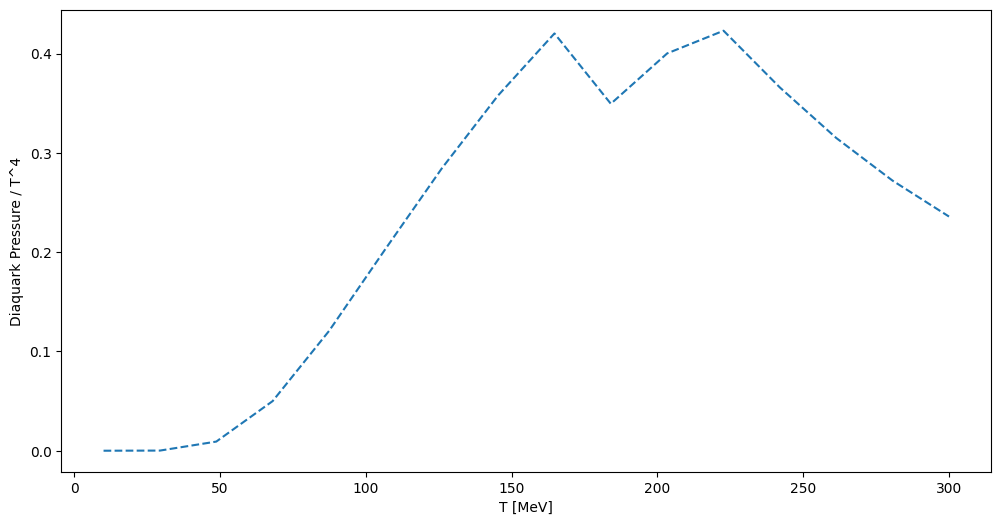

In [21]:

plt.figure(figsize=(12,6))


xpoints = T


plt.plot(xpoints, 4/3*(np.array(fp))/T**4, linestyle = "dashed")


plt.xlabel('T [MeV]')

plt.ylabel('Diaquark Pressure / T^4')


In [19]:
fp2=fp

In [ ]:
47864.410985467446/80**4


0.001168564721324889

In [ ]:
def PressText(T,mu):
    x = Pot_Sol(T,mu).x
    return TMQGP.pressure_diquark_Test(Gd,T,mu,x[0],x[1],x[2],x0[0],x0[1],x0[2],1)

In [ ]:


x0 = Pot_Sol(0,0).x


M1(200,0)

235409175.23339716

In [ ]:
235409175.23339716/200**4

0.14713073452087322

In [55]:

from syntax_sugar import *

Gv = 2*Gs
Gd = 1.4*Gs

ND_Integral_Bound = Lamba_CutOff


x0 = Pot_Sol(0,0).x

#T = np.array(np.arange(25, 233, 14).tolist() + np.arange(250, 350, 50).tolist())
T = np.array(np.linspace(10, 300, 64).tolist())

k = []
for i in [0,10,20,30,40]:
    fp = pipe(T.tolist()) | p[lambda x: M1(x,i)]*(16//1) | END
    k.append(fp)
    print(i)

/tmp/ipykernel_6320/3047718320.py:71: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  Q += scipy.integrate.quad( lambda p: p**2 * 2*T*log( 1 + np.exp(-Epm( p , m , mu_star, Delta, 1)/T) ), 1e-8, ND_Integral_Bound, limit = 200000)[0]
/tmp/ipykernel_6320/3047718320.py:72: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  Q += scipy.integrate.quad( lambda p: p**2 * 2*T*log( 1 + np.exp(-Epm( p , m , mu_star, Delta, -1)/T) ), 1e-8, ND_Integral_Bound, limit = 200000)[0]
/tmp/ipykernel_6320/3047718320.py:71: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  Q += scipy.integrate.quad( lambda p: p**2 * 2*T*log( 1 + np.exp(-Epm( p , m , mu_star, 

0


[WARNING] GSL integration failed in pressure_diquark_Test:
    status = exceeded max number of iterations
    result = 244.025, error = 0.263728
    parameters:  Gd=7.056e-06 T=33.0159 mu=0 m=325.523 mu*=2.37566e-27 delta=0 thermal_cutoff=1 Nf=2 Lambda=651
[WARNING] GSL integration failed in pressure_diquark_Test:
    status = exceeded max number of iterations
    result = 26.149, error = 0.040422
    parameters:  Gd=7.056e-06 T=28.4127 mu=0 m=325.525 mu*=3.95951e-28 delta=0 thermal_cutoff=1 Nf=2 Lambda=651
[WARNING] GSL integration failed in pressure_diquark_Test:
    status = exceeded max number of iterations
    result = 1351.77, error = 0.560646
    parameters:  Gd=7.056e-06 T=37.619 mu=0 m=325.515 mu*=0 delta=0 thermal_cutoff=1 Nf=2 Lambda=651
[WARNING] GSL integration failed in pressure_diquark_Test:
    status = exceeded max number of iterations
    result = 1.06361, error = 0.00469367
    parameters:  Gd=7.056e-06 T=23.8095 mu=0 m=325.525 mu*=0 delta=0 thermal_cutoff=1 Nf=2 Lam

10


[WARNING] GSL integration failed in pressure_diquark_Test:
    status = exceeded max number of iterations
    result = 1337.9, error = 0.354208
    parameters:  Gd=7.056e-06 T=37.619 mu=10 m=325.515 mu*=9.9976 delta=0 thermal_cutoff=1 Nf=2 Lambda=651
/tmp/ipykernel_6320/3047718320.py:72: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  Q += scipy.integrate.quad( lambda p: p**2 * 2*T*log( 1 + np.exp(-Epm( p , m , mu_star, Delta, -1)/T) ), 1e-8, ND_Integral_Bound, limit = 200000)[0]
/tmp/ipykernel_6320/3047718320.py:72: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  Q += scipy.integrate.quad( lambda p: p**2 * 2*T*log( 1 + np.exp(-Epm( p , m , mu_star, Delta, -1)/T) ), 1e-8, ND_Integral_Bound, limit = 200000)[0]
/tmp/ipykernel_6320/3047718320.py:71: Int

20


/tmp/ipykernel_6320/3047718320.py:72: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  Q += scipy.integrate.quad( lambda p: p**2 * 2*T*log( 1 + np.exp(-Epm( p , m , mu_star, Delta, -1)/T) ), 1e-8, ND_Integral_Bound, limit = 200000)[0]
/tmp/ipykernel_6320/3047718320.py:73: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  Q += scipy.integrate.quad( lambda p: p**2 * T*log( 1 + np.exp(-epsilonpm( p , m , mu_star, 1)/T) ),1e-8, ND_Integral_Bound, limit = 200000)[0]
/tmp/ipykernel_6320/3047718320.py:72: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  Q += scipy.integrate.quad( lambda p: p**2 * 2*T*log( 1 + np.exp(-Epm( p , m , mu_star, Delt

30


Integration failed with error code: 4
Integration failed with error code: 4
Integration failed with error code: 4
Integration failed with error code: 4
Integration failed with error code: 4
Integration failed with error code: 4
Integration failed with error code: 4
Integration failed with error code: 4
Integration failed with error code: 4
Integration failed with error code: 4
Integration failed with error code: 4
Integration failed with error code: 4
Integration failed with error code: 4
[WARNING] GSL integration failed in pressure_diquark_Test:
    status = exceeded max number of iterations
    result = 217.085, error = 0.753597
    parameters:  Gd=7.056e-06 T=33.0159 mu=30 m=325.521 mu*=29.9978 delta=0 thermal_cutoff=1 Nf=2 Lambda=651
[WARNING] GSL integration failed in pressure_diquark_Test:
    status = exceeded max number of iterations
    result = 5018.66, error = 1.10844
    parameters:  Gd=7.056e-06 T=42.2222 mu=30 m=325.486 mu*=29.9785 delta=0 thermal_cutoff=1 Nf=2 Lambda=651

40


In [ ]:
T = np.array(np.linspace(10, 300, 16).tolist())
k = np.array([[5.77024813e+04, 2.40814838e+03, 5.44284096e+02, 2.16282570e+02,
        9.54135261e+01, 5.15573174e+01, 2.99028498e+01, 1.78437461e+01,
        1.02898549e+01, 5.18718925e+00, 1.54227289e+00, 5.64033343e-01,
        4.74779062e-01, 4.16455392e-01, 3.74095174e-01, 3.41220672e-01]])*T**4

In [ ]:
k

[[3.3745914594097165e-08,
  317.59068071349355,
  80931.40459019679,
  1289835.948099193,
  6987047.513468231,
  24154184.28225856,
  62993032.897138685,
  136530583.9009433,
  257818082.45698282,
  431432461.5533533,
  635962004.2549087,
  847197238.9885488,
  1086384477.0848384,
  1368470935.1705601,
  1698485074.3769803,
  2079301824.7572157],
 [1.2311720618164654e-07,
  394.3137397783522,
  87864.98613912618,
  1346099.0082030671,
  7165609.459872115,
  24552631.90190682,
  63701264.38853666,
  137612258.16204178,
  259279620.8077157,
  433175786.4106207,
  637739220.0114796,
  848957534.048262,
  1088228919.178762,
  1370436453.8955204,
  1700580673.487983,
  2081531862.8875852],
 [8.93657217379335e-07,
  661.5652799991723,
  109863.35693704382,
  1520142.054380318,
  7710728.029544033,
  25761976.060377326,
  65842796.57699856,
  140873639.9238379,
  263691544.7300418,
  438416775.8605586,
  643044364.3700513,
  854238257.6488374,
  1093774621.8522584,
  1376335120.31048,
  17068

In [7]:
list(map(list, zip(*k)))

[[0.0, 0.0, 0.0],
 [42.45388527887594, 41.70214953689455, 39.41361134729643],
 [19770.547825127025, 19623.713243470564, 19194.97800939387],
 [360883.8186744292, 359275.2930900893, 354527.11289070424],
 [2097919.920350671, 2091634.5954575536, 2072984.8936296373],
 [7106424.538987515, 7091558.483286668, 7047365.544749259],
 [17868328.99841552, 17842243.26748634, 17764558.48745614],
 [37395648.91509387, 37358342.44968144, 37247268.73625345],
 [69026535.3373645, 68979960.81179278, 68841320.9974203],
 [114750782.539818, 114685415.779219, 114489817.65973385],
 [166661966.38778052, 166508446.36231005, 166046607.88677073],
 [204636736.6286787, 204380334.53701642, 203612337.46671033],
 [231087348.501608, 230799463.66635668, 229938067.30593318],
 [253723187.73699456, 253427663.2910477, 252543411.48101595],
 [274818604.4973833, 274521654.7871098, 273633018.20167065],
 [295047530.29646045, 294751250.0153443, 293864495.2125866]]

Text(0, 0.5, 'Diquark Pressure / T^4')

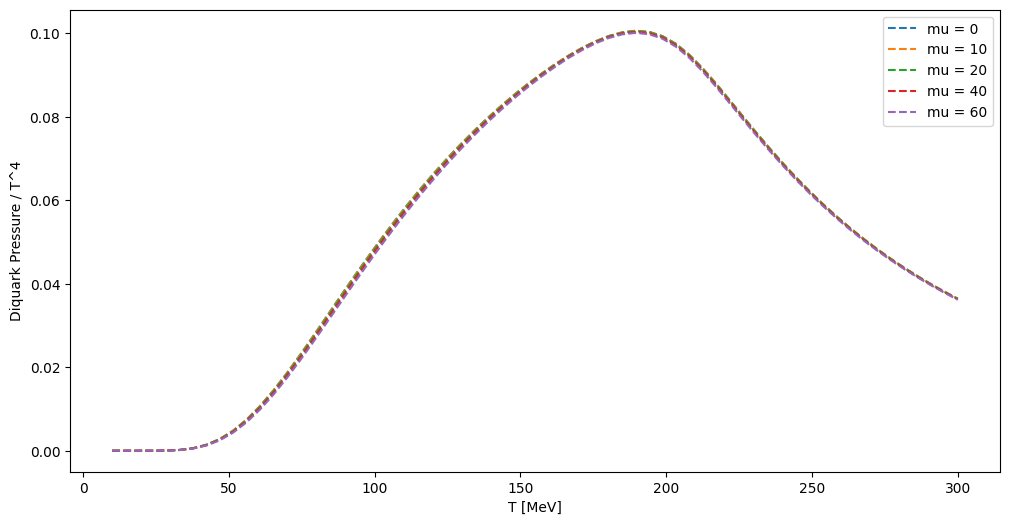

In [29]:

plt.figure(figsize=(12,6))


xpoints = T


plt.plot(xpoints, (np.array(k[0]))/T**4, linestyle = "dashed")


plt.plot(xpoints, (np.array(k[1]))/T**4, linestyle = "dashed")

plt.plot(xpoints, (np.array(k[2]))/T**4, linestyle = "dashed")
plt.plot(xpoints, (np.array(k[3]))/T**4, linestyle = "dashed")
plt.plot(xpoints, (np.array(k[4]))/T**4, linestyle = "dashed")

plt.legend(['mu = 0' , 'mu = 10', 'mu = 20',
            'mu = 40' , 'mu = 60', 'mu = 100'])

plt.xlabel('T [MeV]')

plt.ylabel('Diquark Pressure / T^4')


In [ ]:
list(map(list, zip(*(k[::-1][0:3] + k))))[7]

[9714989.858829398,
 9360422.80250969,
 9243289.383524917,
 9243289.383524917,
 9360422.80250969,
 9714989.858829398]

In [ ]:
np.arange(25, 425, 25)[5]

np.int64(150)

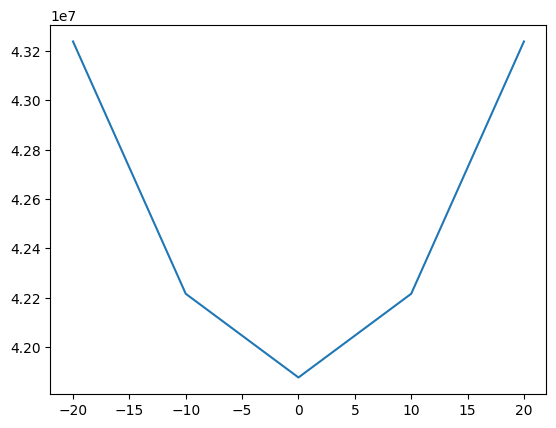

In [ ]:
j = 9

plt.plot([-20,-10,0,10,20],list(map(list, zip(*(k[::-1][0:2] + k))))[j])

In [56]:
s = []
for j in range(len(T)):
    x = [-40,-30,-20,-10,0,10,20,30,40]
    f = list(map(list, zip(*(k[::-1][0:4] + k))))[j]

    s.append(np.polyfit(x,f,2)[-3])

In [92]:
Dchi0 = [4.240537688745569e-06,
 0.013864526011134371,
 0.7987830648168155,
 9.357142802102755,
 49.471071610247094,
 159.57594760943616,
 405.71029012050695,
 841.3630507369903,
 1558.4314183403126,
 2655.5458344981234,
 3792.2833957611056,
 5509.299336021887,
 7186.313111101369,
 8577.227368336526,
 9430.03467100157,
 10192.869752418303]





Dchi1 = [4.2167314040317025e-06,
 0.013814542162527482,
 0.7952629126163393,
 9.234795681932269,
 47.88240652868018,
 148.81258085549504,
 360.68963386314357,
 701.8442874758965,
 1203.8190782978438,
 1868.7524783731387,
 2510.110026853207,
 3289.064684419382,
 3925.900056442526,
 4347.507221174955,
 4516.138916267058,
 4705.653917234389]




Dchi2 =  [4.240507208426316e-06,
 0.013856202968608202,
 0.7945037660928397,
 9.127546191296956,
 46.2138377571976,
 138.5786398465687,
 323.68619469313177,
 592.3776722235315,
 952.9301896896897,
 1327.8290751230234,
 1912.1834326304565,
 2181.236409430573,
 2474.5977940845996,
 2623.3229423816724,
 2640.435093398567,
 2698.489816429254]

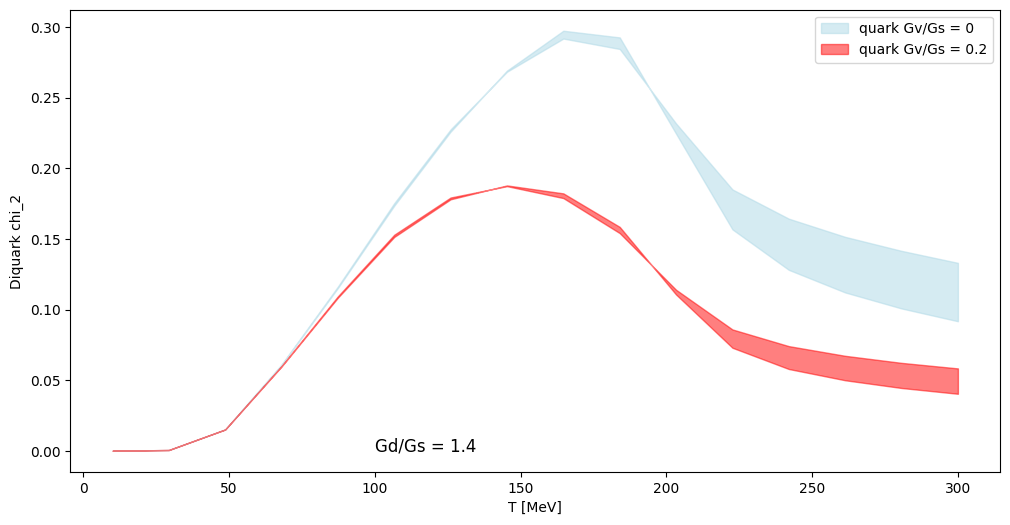

In [100]:

plt.figure(figsize=(12,6))

T = np.array(np.linspace(10, 300, 16).tolist())
xpoints = T

#plt.plot(xpoints, 0.5*(np.array(sq14))/T**2 , color="blue")
# plt.plot(xpoints, 0.5*(np.array(sq1402))/T**2 , color="orange")
# #plt.plot(xpoints, 0.5*(np.array(sq1404))/T**2)
# plt.plot(xpoints, 0.5*(np.array(sq1406))/T**2 , color="green")
# #plt.plot(xpoints, 0.5*(np.array(sq1408))/T**2)
# plt.plot(xpoints, 0.5*(np.array(sq1410))/T**2 , color="red")
# #plt.plot(xpoints, 0.5*(np.array(sq1414))/T**2)


# plt.plot(xpoints, 0.5*(np.array(sq14) + np.array(s14))/T**2, linestyle = "dashed", color="blue")
# plt.plot(xpoints, 0.5*(np.array(sq1402) + np.array(s1402))/T**2, linestyle = "dashed" , color="orange")
# #plt.plot(xpoints, 0.5*(np.array(sq1404) + np.array(s1404))/T**2, linestyle = "dashed")
# plt.plot(xpoints, 0.5*(np.array(sq1406) + np.array(s1406))/T**2, linestyle = "dashed", color="green")
# #plt.plot(xpoints, 0.5*(np.array(sq1408) + np.array(s1408))/T**2, linestyle = "dashed")
# plt.plot(xpoints, 0.5*(np.array(sq1410) + np.array(s1410))/T**2, linestyle = "dashed", color="red")
# #plt.plot(xpoints, 0.5*(np.array(sq1414) + np.array(s1414))/T**2, linestyle = "dashed")

#plt.plot(xpoints, 0.5*(np.array(Dchi0))/T**2, linestyle = "dashed", color="blue")



plt.fill_between(xpoints, 0.5*(np.array(s14))/T**2 + 0.5*sL14(T)/T**2, 0.5*(np.array(s14))/T**2 + 0.5*SL14(T)/T**2, color='lightblue', alpha=0.5)


plt.fill_between(xpoints, 0.5*(np.array(s1410))/T**2 + 0.5*sL141(T)/T**2, 0.5*(np.array(s1410))/T**2 + 0.5*SL141(T)/T**2, color='red', alpha=0.5)

# plt.fill_between(xpoints, 0.5*(np.array(s1410))/T**2 + 0.5*sL14(T)/T**2, 0.5*(np.array(s14))/T**2 + 0.5*SL14(T)/T**2, color='lightblue', alpha=0.5)


plt.legend(['quark Gv/Gs = 0'
            ,'quark Gv/Gs = 0.2'
            ,'quark Gv/Gs = 0.6'
            ,'quark  Gv/Gs = 1.0','quark Gv/Gs = 0 + Diquark' , 'quark Gv/Gs = 0.2 + Diquark'#, 'Gv/Gs = 0.4'
            ,'quark Gv/Gs = 0.6 + Diquark'#,'Gv/Gs = 0.8'
            ,'quark Gv/Gs = 1.0 + Diquark'#'Gv/Gs = 1.4'
            ])

plt.xlabel('T [MeV]')

plt.ylabel('Diquark chi_2')

plt.text(100,0,"Gd/Gs = 1.4",size="large")

#plt.axhline(1, linestyle = "dotted", color ="black")

plt.show()

In [77]:
from scipy.interpolate import CubicSpline
sL14 = CubicSpline(np.array(np.linspace(10, 300, 64).tolist()), s0)
sL141 = CubicSpline(np.array(np.linspace(10, 300, 64).tolist()), s1)
sL142 = CubicSpline(np.array(np.linspace(10, 300, 64).tolist()), s2)

SL14 = CubicSpline(np.array(np.linspace(10, 300, 64).tolist()), S0)
SL141 = CubicSpline(np.array(np.linspace(10, 300, 64).tolist()), S1)
SL142 = CubicSpline(np.array(np.linspace(10, 300, 64).tolist()), S2)

In [89]:
Dchi0

[4.240537688745569e-06,
 0.013864526011134371,
 0.7987830648168155,
 9.357142802102755,
 49.471071610247094,
 159.57594760943616,
 405.71029012050695,
 841.3630507369903,
 1558.4314183403126,
 2655.5458344981234,
 3792.2833957611056,
 5509.299336021887,
 7186.313111101369,
 8577.227368336526,
 9430.03467100157,
 10192.869752418303,
 12390.704689421478,
 16194.80879272337,
 19720.912660332797,
 22856.790768512492]

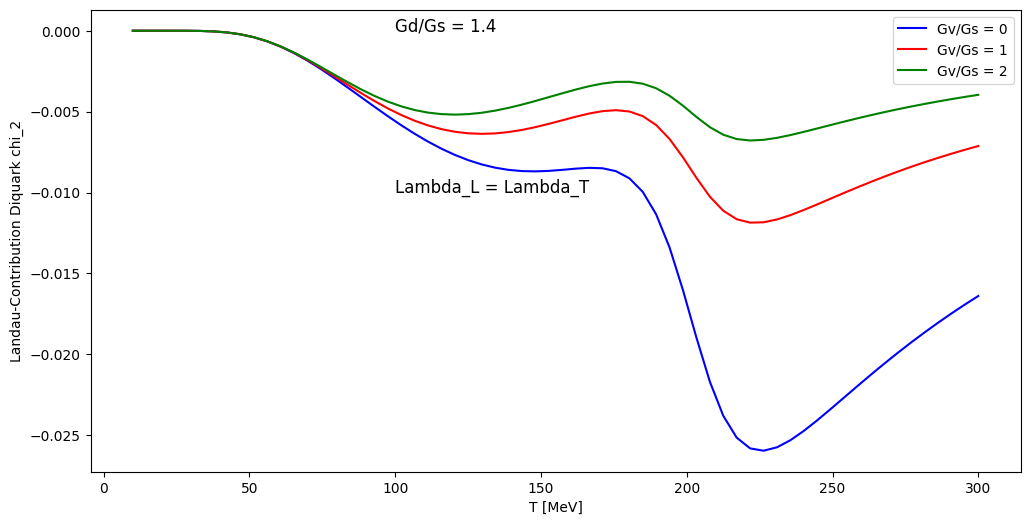

In [ ]:

plt.figure(figsize=(12,6))


xpoints = T

plt.plot(xpoints, 0.5*(np.array(s0))/T**2 , color="blue")

plt.plot(xpoints, 0.5*(np.array(s1))/T**2 , color="red")

plt.plot(xpoints, 0.5*(np.array(s2))/T**2 , color="green")


plt.legend(['Gv/Gs = 0'
            ,'Gv/Gs = 1'
            ,'Gv/Gs = 2'
            ])

plt.xlabel('T [MeV]')

plt.ylabel('Landau-Contribution Diquark chi_2')

plt.text(100,0,"Gd/Gs = 1.4",size="large")

plt.text(100,-0.01,"Lambda_L = Lambda_T",size="large")

#plt.axhline(1, linestyle = "dotted", color ="black")

plt.show()2

In [57]:
S2=s

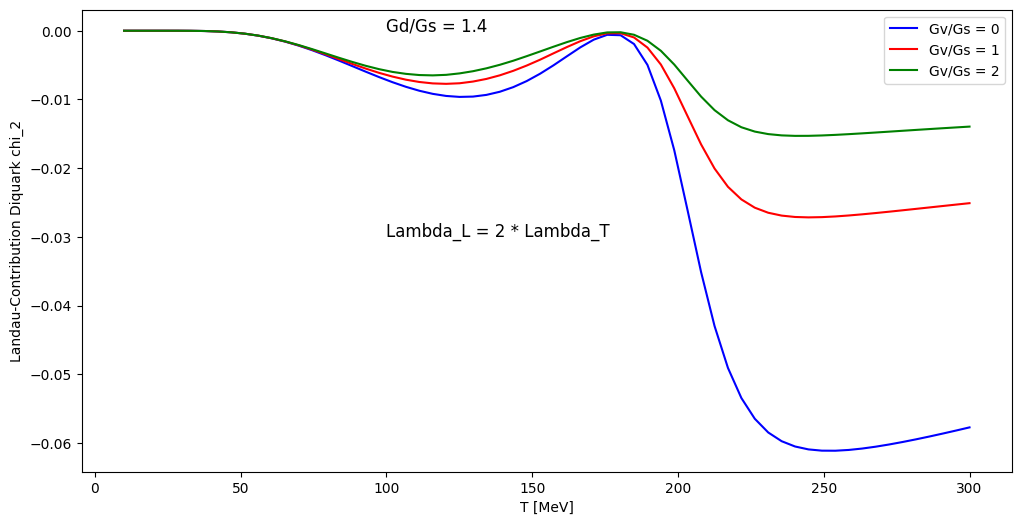

In [60]:

plt.figure(figsize=(12,6))


xpoints = T

plt.plot(xpoints, 0.5*(np.array(S0))/T**2 , color="blue")

plt.plot(xpoints, 0.5*(np.array(S1))/T**2 , color="red")

plt.plot(xpoints, 0.5*(np.array(S2))/T**2 , color="green")


plt.legend(['Gv/Gs = 0'
            ,'Gv/Gs = 1'
            ,'Gv/Gs = 2'
            ])

plt.xlabel('T [MeV]')

plt.ylabel('Landau-Contribution Diquark chi_2')

plt.text(100,0,"Gd/Gs = 1.4",size="large")

plt.text(100,-0.03,"Lambda_L = 2 * Lambda_T",size="large")

#plt.axhline(1, linestyle = "dotted", color ="black")

plt.show()

In [63]:
k14 = [[3.3745914594097165e-08,  317.59068071349355,  80931.40459019679,  1289835.948099193,  6987047.513468231,  24154184.28225856,  62993032.897138685,  136530583.9009433,  257818082.45698282,  431432461.5533533,  635962004.2549087,  847197238.9885488,  1086384477.0848384,  1368470935.1705601,  1698485074.3769803,  2079301824.7572157],
 [1.231172061817113e-07,  394.31400835883767,  87867.71828543319,  1346288.4845301628,  7167705.986727316,  24562995.026568808,  63735761.75434026,  137692234.43168303,  259439857.89136758,  433422391.28288305,  638041494.495774,  849288373.726728,  1088595175.2935696,  1370833771.815539,  1701010093.649292,  2081989953.7715275],
 [8.936572173796443e-07,  661.5666921594454,  109875.48447632084,  1520943.6386595736,  7719398.700606185,  25805852.649746306,  65983026.13695658,  141208185.31549135,  264330322.1806792,  439401398.34297216,  644258007.5691123,  855562690.1964291,  1095230301.6906075,  1377922543.2619007,  1708587889.9472828,  2090060962.2411501]]

s14 =  [2.3292161628335434e-09, 0.8731838503522286, 72.7883515385881, 579.6612066997016, 1834.3484300240405, 4135.037129521772, 7481.796603477453, 11705.074711937512, 16289.57716144011, 19925.63407101136, 20732.166267916487, 20913.953825116278, 22115.64428972408, 23629.113625288246, 25258.016954703617, 26900.208505082217]




k12 = [[1.2063020043745606e-15,  1.3961723419317302,  3764.163962166406,  159262.50511023353,  1507365.0047533552,  7299472.645007471,  23993506.110260934,  61613265.38802642,  132585591.85860856,  246328240.68298554,  395176641.0007199,  561117009.263931, 753330582.052988,  981783429.7545085,  1250731016.1893942,  1562843688.897771],
 [6.7098571378268305e-15,  1.7328959696717896,  4086.338987581744,  166181.6540174028,  1546253.296486151,  7423116.2647512965,  24277493.539567746,  62145403.34536459,  133438680.8724105,  247504331.3764365,  396531404.75831974,  562576303.009527,  754938895.8115168,  983554647.9997778,  1252666432.8313577,  1564939422.9650395],
 [4.8704096241048224e-14,  2.9085729426159745,  5108.3332148281115,  187574.05717950614,  1664974.600107481,  7798420.339413246,  25135974.558428984,  63749595.727507025,  136008229.28320986,  251044029.23899987,  400597336.6761642,  566955662.2900805,  759767133.2624942,  988870493.7403326,  1258473271.5947375,  1571230302.6685424]]

s12 = [1.2784576191413583e-16, 0.0038401108194691873, 3.3802335427258217, 71.00565033053715, 394.7584271077938, 1248.931098668171, 2858.4992386132376, 5343.603888032967, 8560.265479143694, 11793.55202653952, 13552.325133270158, 14597.160438147288, 16092.555229261183, 17718.442466256485, 19355.848812460736, 20967.84782039215]




k10 = [[2.016041207170465e-20,  0.042252786903236306,  475.93951412644157,  36537.299157018104,  486511.34332098736,  2915927.260088429,  11136888.432327632,  32003055.213524114,  75211816.10940382,  150061262.76963517,  254993649.928768,  378187604.70185316,  524592030.487121,  701257297.7265416,  911613021.9019072,  1157935317.7801504],
 [1.1863465306378971e-19,  0.04960981748517662,  516.689183590351,  38124.313345985625,  499134.04827866936,  2965841.6312284847,  11270969.45133556,  32285593.116723813,  75710792.70326656,  150806536.41372746,  255907215.3364788,  379214253.42612964,  525757679.8693862,  702569892.8399582,  913072273.9912895,  1159538085.3331764],
 [8.611202059383254e-19,  0.08550353963162201,  645.9020422498616,  43028.165337658684,  537677.4861871452,  3117429.2065863567,  11676008.041281657,  33138559.754515894,  77214619.45614296,  153049115.2676563,  258650269.83225235,  382296295.6499474,  529256938.5762261,  706509992.46859,  917452309.239164,  1164349153.885988]]

s10 = [2.2620647810587953e-21, 0.00011306353553547301, 0.42739340968990047, 16.278168817590917, 128.15654396376203, 504.413602651141, 1348.797427000159, 2840.673112548368, 5009.47157087931, 7472.044788499873, 9142.391998939887, 10272.47595987379, 11663.09542277826, 13132.56338668495, 14599.032264472215, 16035.578083784258]




k08 = [[4.8054891631134074e-23,  0.004876548625198154,  107.65627296245741,  11659.223994160777,  192034.09614519041,  1326046.0368407543,  5622502.468445608,  17522552.52027571,  43960603.506122544,  92560328.6691718,  164318369.22617915,  251943166.59705558,  358482829.86273444,  489041260.5001248,  646360268.5620732,  832338151.7906834],
 [1.406259151876279e-22,  0.004574504997395012,  116.91064438405274,  12166.045419621863,  197041.00598073454,  1348970.000760989,  5691221.83939711,  17680554.419868123,  44260212.59627687,  93035588.75695877,  164929402.83772603,  252653148.04860514,  359306907.1726845,  489985637.31656206,  647425292.4012643,  833523010.9883943],
 [1.0207457426585337e-21,  0.00761808403240367,  146.15235261879855,  13731.520068608237,  212334.80526032188,  1418611.938724295,  5899302.30522269,  18157964.227949075,  45163980.068259634,  94466167.24983758,  166764579.24875492,  254781203.6333469,  361781094.967665,  492822604.0951654,  650625403.1533873,  837079673.01722]]

s08 = [2.6468723978547228e-24, 8.264449203163101e-06, 0.09676826841583848, 5.196815319191204, 50.849297706741126, 231.7254854954938, 692.6861465752293, 1589.7450225061448, 3010.205763028318, 4766.310105063699, 6116.266333720936, 7094.418030046935, 8246.361285587005, 9454.72910520574, 10664.636204910305, 11854.54750766089]




k06 = [[9.564679467733799e-24,  0.0011487333360504538,  35.122750997142006,  4497.725518058891,  83845.23020795324,  634898.6491374426,  2896777.583494563,  9585156.567766855,  25280081.974758703,  55524550.96492641,  102061423.8662725,  160711802.34562033,  233460117.05861804,  323901531.5722846,  434131463.42727226,  565655999.0095897],
 [3.030553428256879e-23,  0.0013266100126135742,  38.1340740079236,  4693.365357151551,  86040.47733822436,  645964.462339312,  2932641.400682537,  9673157.861986939,  25456418.135627367,  55817829.33344036,  102453095.058413,  161178225.84119698,  234012702.55599174,  324544759.4569286,  434866751.02468246,  566481620.1153141],
 [2.199754224294363e-22,  0.002173720587333604,  47.66843547043886,  5297.59737514273,  92746.80926350485,  679587.6559813566,  3041269.9805675508,  9939154.508523945,  25988541.940452747,  56700914.737603895,  103629662.21968836,  162578899.92791185,  235672118.64406416,  326477233.25546986,  437074064.1819583,  568960426.7919587]]

s06 = [5.715437587265286e-25, 2.674425465718828e-06, 0.03154292276544579, 2.0058626786785902, 22.297015686903066, 111.87457212279823, 361.60139565428665, 885.7065532772765, 1772.2625293134274, 2942.0702526300806, 3921.1507352731423, 4668.245241437648, 5530.596676455118, 6440.250688180975, 7357.019874231186, 8261.763512876245]




k1410 = [[3.3745914594097165e-08,  317.59068071349355,  80931.40459019679,  1289835.948099193,  6987047.513468231,  24154184.28225856,  62993032.897138685,  136530583.9009433,  257818082.45698282,  431432461.5533533,  635962004.2549087,  847197238.9885488,  1086384477.0848384,  1368470935.1705601,  1698485074.3769803,  2079301824.7572157],
 [1.2311720618168897e-07,  394.3126089295857,  87853.49545416003,  1345311.8019210228,  7157171.828671269,  24511575.78224444,  63579189.021930605,  137345701.30878475,  258817558.65715867,  432516922.4005779,  636975316.5596457,  848166846.4321208,  1087379826.4744582,  1369514139.016878,  1699594009.4411552,  2080479295.1651504],
 [8.936572173797009e-07,  661.5593341670104,  109812.37980928847,  1516813.4717379676,  7675918.61951078,  25595541.616749953,  65349535.741801135,  139798144.9189381,  261812373.94030058,  435750262.4426609,  640031089.7512563,  851074798.4615468,  1090367507.217628,  1372658885.9319718,  1702921706.0916324,  2084012655.51034]]

s1410 = [2.3292161628337374e-09, 0.8731648267013451, 72.62837082031437, 569.2559906510276, 1725.1684241172281, 3607.604527138417, 5895.499377904228, 8171.435183068684, 9984.438237799768, 10787.344187701201, 10178.36955422555, 9693.587860605578, 9958.158394227628, 10475.282395007782, 11091.897664468403, 11777.415854735023]



k1404 = [[3.3745914594097165e-08,  317.59068071349355,  80931.40459019679,  1289835.948099193,  6987047.513468231,  24154184.28225856,  62993032.897138685,  136530583.9009433,  257818082.45698282,  431432461.5533533,  635962004.2549087,  847197238.9885488,  1086384477.0848384,  1368470935.1705601,  1698485074.3769803,  2079301824.7572157],
 [1.2311720618175266e-07,  394.31345706395115,  87862.11135127887,  1345900.6513748323,  7163443.188278585,  24541592.871780585,  63667468.178006515,  137536705.72870806,  259140167.67350605,  432965490.2010244,  637487938.6876962,  848685079.9893324,  1087936947.608416,  1370117463.4793518,  1700237062.437168,  2081164717.8838527],
 [8.936572173796394e-07,  661.5637935249878,  109850.59877057446,  1519302.9408530898,  7701761.14288619,  25717670.060872436,  65705668.04644724,  140559156.70420167,  263117816.69016886,  437546196.3934357,  642034431.8246751,  853157801.5517919,  1092598069.4846597,  1375058761.1493776,  1705494848.464518,  2086756016.9818058]]

s1404 = [2.32921616283347e-09, 0.8731763561036151, 72.72525942810468, 575.5275460459346, 1790.045120036517, 3913.6613824367446, 6786.90716821327, 10072.891112502828, 13253.404642641262, 15277.77290356224, 15169.886723921554, 14904.691608146564, 15535.306108664254, 16470.17664120429, 17525.08587841266, 18636.416175059105]




k1414 = [[3.3745914594097165e-08,  317.59068071349355,  80931.40459019679,  1289835.948099193,  6987047.513468231,  24154184.28225856,  62993032.897138685,  136530583.9009433,  257818082.45698282,  431432461.5533533,  635962004.2549087,  847197238.9885488,  1086384477.0848384,  1368470935.1705601,  1698485074.3769803,  2079301824.7572157],
 [1.2311720618174295e-07,  394.3120435152132,  87847.76324062841,  1344924.3991989053,  7153178.611430443,  24493418.71553699,  63529572.624904655,  137247750.9298726,  258664128.1175802,  432318652.06301737,  636768571.7334695,  847958232.8881469,  1087160281.3629918,  1369282675.02311,  1699343931.0436587,  2080213362.945207],
 [8.936572173793589e-07,  661.5563613158846,  109786.94385489756,  1515176.9172093505,  7659441.74642439,  25521827.66057844,  65149813.55624615,  139404999.8702887,  261196490.45874453,  434958108.28494847,  639201710.3920732,  850239850.3225715,  1089486798.4348366,  1371720917.4526782,  1701921580.206452,  2082947934.5562346]]

s1414 = [2.3292161628326827e-09, 0.8731571405758037, 72.56388554138556, 565.1335530294314, 1683.7962399287264, 3422.9318905162, 5395.745129212772, 7188.092728230563, 8443.957632751477, 8807.289933608927, 8104.0639939546045, 7606.041097781365, 7755.483459773895, 8126.035302407804, 8591.649988948091, 9115.259157208999]



k1408 = [[3.3745914594097165e-08,  317.59068071349355,  80931.40459019679, 1289835.948099193,  6987047.513468231,  24154184.28225856,  62993032.897138685,  136530583.9009433,  257818082.45698282,  431432461.5533533,  635962004.2549087,  847197238.9885488,  1086384477.0848384,  1368470935.1705601,  1698485074.3769803,  2079301824.7572157],
 [1.2311720618172e-07,  394.3128916396181,  87856.36655364458,  1345507.0480462029,  7159223.8038724745,  24521205.996714987,  63607255.27930223,  137401720.43320224,  258910287.68054336,  432641671.233949,  637110955.5628681,  848305211.9327189,  1087526451.4065971,  1369674921.4948802,  1699762144.722217,  2080658106.9521646],
 [8.936572173792985e-07,  661.5608206092508,  109825.11153871457,  1517638.6125053957,  7684353.668473358,  25634430.16479151,  65459894.91079712,  140024194.08476877,  262187751.39408487,  436252772.723616,  640574936.6370752,  851626922.0106869,  1090954674.2716997,  1373288052.1878045,  1703594423.9955037,  2084728832.326819]]

s1408 = [2.3292161628325433e-09, 0.8731686698076995, 72.66064561941107, 571.3346126648493, 1746.3371708657312, 3704.9572151563852, 6170.716635933366, 8737.262621988672, 10924.475215204899, 12044.875228470893, 11538.447794819078, 11073.418714438347, 11426.314359948106, 12043.211014526134, 12773.755559727642, 13568.1899203658]



k1406 = [[3.3745914594097165e-08, 317.59068071349355,  80931.40459019679,  1289835.948099193,  6987047.513468231,  24154184.28225856,  62993032.897138685,  136530583.9009433,  257818082.45698282,  431432461.5533533,  635962004.2549087,  847197238.9885488,  1086384477.0848384,  1368470935.1705601,  1698485074.3769803,  2079301824.7572157],
 [1.2311720618172108e-07,  394.3131743508925,  87859.2389396367,  1345703.3229137682,  7161314.356829453,  24531221.53542371,  63636428.52430142,  137463827.79345244,  259017178.87040105,  432789110.212175,  637286731.5095946,  848474253.0910842,  1087708253.193419,  1369870435.6434526,  1699971638.4986334,  2080881373.7381938],
 [8.936572173790957e-07,  661.5623070616443,  109837.84942762722,  1518468.4018839619,  7692979.182006316,  25675189.824403305,  65578426.057197325,  140277776.84478676,  262616596.68149668,  436829898.42537105,  641228389.2144258,  852307770.3922963,  1091682125.2717175,  1374069790.852139,  1704432400.756482,  2085622333.8881667]]

s1406 = [2.329216162831962e-09, 0.8731725129412896, 72.69293617917275, 573.4250467928036, 1767.9949910213563, 3807.1054730347964, 6467.700989935058, 9373.059993111097, 11997.04576515645, 13483.178693162461, 13154.346663355185, 12777.212435656515, 13245.028950253214, 13997.444128951609, 14868.69805335564, 15802.098972748914]



k1402 = [[3.3745914594097165e-08,  317.59068071349355,  80931.40459019679,  1289835.948099193,  6987047.513468231,  24154184.28225856,  62993032.897138685,  136530583.9009433,  257818082.45698282,  431432461.5533533,  635962004.2549087,  847197238.9885488,  1086384477.0848384,  1368470935.1705601,  1698485074.3769803,  2079301824.7572157],
 [1.2311720618164654e-07,  394.3137397783522,  87864.98613912618,  1346099.0082030671,  7165609.459872115,  24552631.90190682,  63701264.38853666,  137612258.16204178,  259279620.8077157,  433175786.4106207,  637739220.0114796,  848957534.048262,  1088228919.178762,  1370436453.8955204,  1700580673.487983,  2081531862.8875852],
 [8.93657217379335e-07,  661.5652799991723,  109863.35693704382,  1520142.054380318,  7710728.029544033,  25761976.060377326,  65842796.57699856,  140873639.9238379,  263691544.7300418,  438416775.8605586,  643044364.3700513,  854238257.6488374,  1093774621.8522584,  1376335120.31048,  1706869744.8705578,  2088224184.1111484]]

s1402 = [2.329216162832752e-09, 0.8731801992949982, 72.75760449252093, 577.6416463691079, 1812.5701224967381, 4024.47990941325, 7130.422669031175, 10863.482549558103, 14693.40885054969, 17464.719653062093, 17696.434962448056, 17602.488944090026, 18479.78205845061, 19661.216506969842, 20962.488394502085, 22306.68653928039]



In [ ]:
import pandas as pd
T = np.array(np.linspace(10, 300, 16).tolist())

dict = {'Temperature [Mev]': np.array(np.linspace(10, 300, 16).tolist()),
         'chi_2 (0.2, 1.4)': 0.5*np.array(s1402)/(T**2),
         'chi_2 (0.4, 1.4)': 0.5*np.array(s1404)/(T**2),
         'chi_2 (0.6, 1.4)': 0.5*np.array(s1406)/(T**2),
         'chi_2 (0.8, 1.4)': 0.5*np.array(s1408)/(T**2),
         'chi_2 (1.0, 1.4)': 0.5*np.array(s1410)/(T**2),
         'chi_2 (1.4, 1.4)': 0.5*np.array(s1414)/(T**2),
         }
    
df = pd.DataFrame(dict)


df.to_csv('Chi_2_Fixed_Gd.csv', index=False)

In [ ]:
dict

{'Temperature [Mev]': array([ 10.        ,  29.33333333,  48.66666667,  68.        ,
         87.33333333, 106.66666667, 126.        , 145.33333333,
        164.66666667, 184.        , 203.33333333, 222.66666667,
        242.        , 261.33333333, 280.66666667, 300.        ]),
 'chi_2 (0, 0.6)': array([2.85771879e-27, 1.55409538e-09, 6.65899570e-06, 2.16896916e-04,
        1.46169469e-03, 4.91636303e-03, 1.13883030e-02, 2.09666668e-02,
        3.26803479e-02, 4.34497615e-02, 4.74205276e-02, 4.70774848e-02,
        4.72183993e-02, 4.71501589e-02, 4.66971376e-02, 4.58986862e-02]),
 'chi_2 (0, 0.8)': array([1.32343620e-26, 4.80243045e-09, 2.04286549e-05, 5.61939373e-04,
        3.33345725e-03, 1.01832489e-02, 2.18155123e-02, 3.76328413e-02,
        5.55079002e-02, 7.03909219e-02, 7.39672091e-02, 7.15445183e-02,
        7.04046964e-02, 6.92196627e-02, 6.76915371e-02, 6.58585973e-02]),
 'chi_2 (0, 1.0)': array([1.13103239e-23, 6.57006599e-08, 9.02266065e-05, 1.76018261e-03,
        8.40138

In [ ]:
np.set_printoptions(legacy='1.25')
s

[2.32921616283347e-09,
 0.8731763561036151,
 72.72525942810468,
 575.5275460459346,
 1790.045120036517,
 3913.6613824367446,
 6786.90716821327,
 10072.891112502828,
 13253.404642641262,
 15277.77290356224,
 15169.886723921554,
 14904.691608146564,
 15535.306108664254,
 16470.17664120429,
 17525.08587841266,
 18636.416175059105]

Text(0, 0.5, 'chi_2')

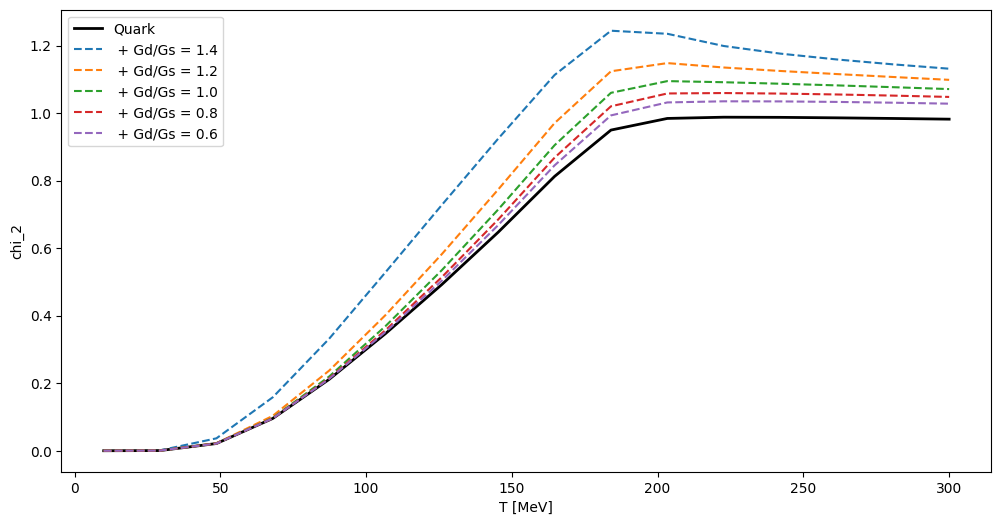

In [ ]:

plt.figure(figsize=(12,6))


xpoints = T

#plt.plot(xpoints, (np.array(pressq2) - 28023056056.734028)/T**4)


plt.plot(xpoints, 0.5*(np.array(chiq2))/T**2, color = "black", linewidth = 2)


plt.plot(xpoints, 0.5*(np.array(chiq2))/T**2 + 0.5*(np.array( s14))/T**2, linestyle = "dashed")
plt.plot(xpoints, 0.5*(np.array(chiq2))/T**2 + 0.5*(np.array( s12))/T**2, linestyle = "dashed")
plt.plot(xpoints, 0.5*(np.array(chiq2))/T**2 + 0.5*(np.array( s10))/T**2, linestyle = "dashed")
plt.plot(xpoints, 0.5*(np.array(chiq2))/T**2 + 0.5*(np.array( s08))/T**2, linestyle = "dashed")
plt.plot(xpoints, 0.5*(np.array(chiq2))/T**2 + 0.5*(np.array( s06))/T**2, linestyle = "dashed")



plt.legend(['Quark', ' + Gd/Gs = 1.4' , ' + Gd/Gs = 1.2', ' + Gd/Gs = 1.0',
            ' + Gd/Gs = 0.8',' + Gd/Gs = 0.6'])

plt.xlabel('T [MeV]')

plt.ylabel('chi_2')

Text(0, 0.5, 'Pressure/ T^4')

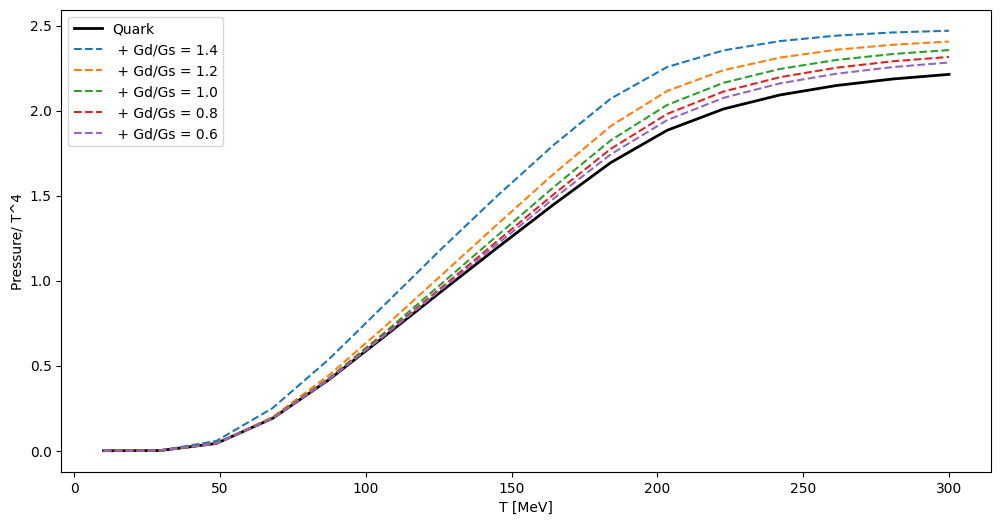

In [ ]:

plt.figure(figsize=(12,6))


xpoints = T

#plt.plot(xpoints, ( np.array(pressq2) - 28023056056.734028 - 28023056056.734028)/T**4)


plt.plot(xpoints, ( np.array(pressq2) - 28023056056.734028)/T**4, color = "black", linewidth = 2)


plt.plot(xpoints, ( np.array(pressq2) - 28023056056.734028)/T**4 + (np.array( k14[0]))/T**4, linestyle = "dashed")
plt.plot(xpoints, ( np.array(pressq2) - 28023056056.734028)/T**4 + (np.array( k12[0]))/T**4, linestyle = "dashed")
plt.plot(xpoints, ( np.array(pressq2) - 28023056056.734028)/T**4 + (np.array( k10[0]))/T**4, linestyle = "dashed")
plt.plot(xpoints, ( np.array(pressq2) - 28023056056.734028)/T**4 + (np.array( k08[0]))/T**4, linestyle = "dashed")
plt.plot(xpoints, ( np.array(pressq2) - 28023056056.734028)/T**4 + (np.array( k06[0]))/T**4, linestyle = "dashed")



plt.legend(['Quark', ' + Gd/Gs = 1.4' , ' + Gd/Gs = 1.2', ' + Gd/Gs = 1.0',
            ' + Gd/Gs = 0.8',' + Gd/Gs = 0.6'])

plt.xlabel('T [MeV]')

plt.ylabel('Pressure/ T^4')

In [86]:
Dchi0 = [4.240537688745569e-06,
 0.013864526011134371,
 0.7987830648168155,
 9.357142802102755,
 49.471071610247094,
 159.57594760943616,
 405.71029012050695,
 841.3630507369903,
 1558.4314183403126,
 2655.5458344981234,
 3792.2833957611056,
 5509.299336021887,
 7186.313111101369,
 8577.227368336526,
 9430.03467100157,
 10192.869752418303,
 12390.704689421478,
 16194.80879272337,
 19720.912660332797,
 22856.790768512492]





Dchi1 = [4.2167314040317025e-06,
 0.013814542162527482,
 0.7952629126163393,
 9.234795681932269,
 47.88240652868018,
 148.81258085549504,
 360.68963386314357,
 701.8442874758965,
 1203.8190782978438,
 1868.7524783731387,
 2510.110026853207,
 3289.064684419382,
 3925.900056442526,
 4347.507221174955,
 4516.138916267058,
 4705.653917234389,
 5481.0618551142,
 7023.2318487697,
 8640.240425548873,
 10271.141117391402]




Dchi2 =  [4.240507208426316e-06,
 0.013856202968608202,
 0.7945037660928397,
 9.127546191296956,
 46.2138377571976,
 138.5786398465687,
 323.68619469313177,
 592.3776722235315,
 952.9301896896897,
 1327.8290751230234,
 1912.1834326304565,
 2181.236409430573,
 2474.5977940845996,
 2623.3229423816724,
 2640.435093398567,
 2698.489816429254,
 3075.210908918442,
 3901.245337911104,
 4824.122504692343,
 5805.354328893161]

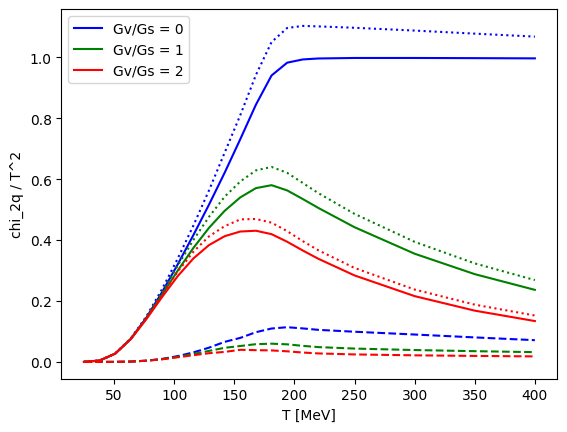

In [ ]:


xpoints = T
plt.plot(xpoints, 0.5*(np.array(chiq0))/T**2, color = "blue", label='Gv/Gs = 0')
plt.plot(xpoints, 0.5*(np.array(Dchi0))/T**2, linestyle = "dashed", color = "blue")
plt.plot(xpoints, 0.5*(np.array(Dchi0)+np.array(chiq0))/T**2, linestyle = "dotted", color = "blue")


plt.plot(xpoints, 0.5*(np.array(chiq1))/T**2, color = "green", label='Gv/Gs = 1')
plt.plot(xpoints, 0.5*(np.array(Dchi1))/T**2, linestyle = "dashed", color = "green")
plt.plot(xpoints, 0.5*(np.array(Dchi1)+np.array(chiq1))/T**2, linestyle = "dotted", color = "green")


plt.plot(xpoints, 0.5*(np.array(chiq2))/T**2, color = "red", label='Gv/Gs = 2')
plt.plot(xpoints, 0.5*(np.array(Dchi2))/T**2, linestyle = "dashed", color = "red")
plt.plot(xpoints, 0.5*(np.array(Dchi2)+np.array(chiq2))/T**2, linestyle = "dotted", color = "red")

plt.legend()

plt.xlabel("T [MeV]")
plt.ylabel("chi_2q / T^2")

plt.show()

In [84]:
Dchi2075 =  [2.0953672761133464e-07,
 0.001597977393545467,
 0.14154262974003826,
 2.1187409318345893,
 12.798174046706462,
 46.50215934663151,
 120.45464104155096,
 243.62279293562847,
 423.73529567710426,
 648.137638392179,
 900.0724780963019,
 1163.6930143718282,
 1390.5135572122022,
 1538.864397648923,
 1603.3021257291641,
 1681.1651824722949,
 1999.2215893953803,
 2653.708250082919,
 3369.843036261735,
 4124.973916826493]


Dchi211 = [2.8245757920984723e-05,
 0.052266808374871535,
 2.3304610028537094,
 23.407690102893028,
 102.16771713635386,
 269.92473304064526,
 518.1098057940454,
 884.5062669196327,
 1378.835674910027,
 1855.0538953474188,
 2502.2558742321894,
 3007.1462223018625,
 3129.129475361686,
 3232.7792612067483,
 3197.9972227979333,
 3226.9596394681917,
 3602.713957116455,
 4475.981103559332,
 5468.180547630477,
 6530.105349632138]

Dchi212 = [3.040828052121748e-05,
 0.057102227133186044,
 2.6984013623960554,
 29.242582703711246,
 151.24207977667425,
 510.63730457915426,
 1309.091654667516,
 2735.9467009152672,
 4681.006396335634,
 5496.928958397553,
 3163.080243630917,
 3712.528581460452,
 3707.99595688214,
 4032.8587345693195,
 3878.874054597146,
 3854.362691137309,
 4201.476715688962,
 5102.700275791682,
 6153.413610451297,
 7292.2707036232705]


Dchi213 = [3.041499496193598e-05,
 0.057158037635896185,
 2.704159891228958,
 29.36821598413982,
 152.75637036570328,
 522.4429306579165,
 1376.9796537214218,
 3050.4095910145056,
 5938.619426597853,
 10284.204781973402,
 15155.454754721855,
 14123.13215460911,
 4599.465169857784,
 5015.409551679544,
 4684.5184018741475,
 4626.5088125506945,
 4887.127440202482,
 5788.667617386196,
 6885.521248116831,
 8090.034668264996]


Dchi215 = [3.0423262231423855e-05,
 0.057227618345738356,
 2.7107211027844116,
 29.472114929249834,
 153.45869840422023,
 525.5815978767383,
 1389.5781207624514,
 3103.3797985821907,
 6172.361464526798,
 11298.37236880616,
 19369.592212765176,
 31086.77251786251,
 44849.719137649525,
 48041.00324875477,
 7490.8503752490515,
 6312.688902575226,
 6679.328375307476,
 7451.5570849621645,
 8513.828531276942,
 9810.856806431431]

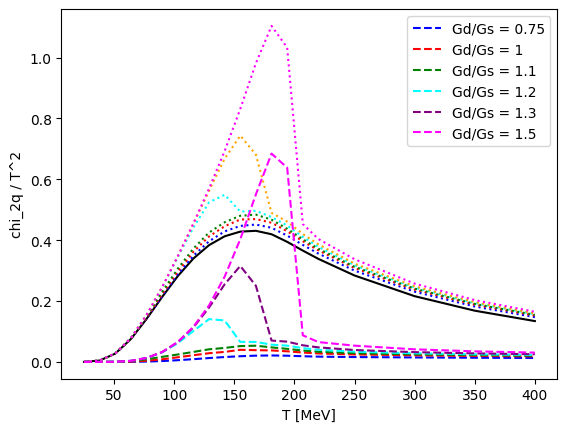

In [ ]:
xpoints = T


plt.plot(xpoints, 0.5*(np.array(chiq2))/T**2, color="black")


plt.plot(xpoints, 0.5*(np.array(Dchi2075))/T**2, linestyle = "dashed", color = "blue", label='Gd/Gs = 0.75')
plt.plot(xpoints, 0.5*(np.array(Dchi2075)+np.array(chiq2))/T**2, linestyle = "dotted", color = "blue")


plt.plot(xpoints, 0.5*(np.array(Dchi2))/T**2, linestyle = "dashed", color = "red", label='Gd/Gs = 1')
plt.plot(xpoints, 0.5*(np.array(Dchi2)+np.array(chiq2))/T**2, linestyle = "dotted", color = "red")



plt.plot(xpoints, 0.5*(np.array(Dchi211))/T**2, linestyle = "dashed", color = "green", label='Gd/Gs = 1.1')
plt.plot(xpoints, 0.5*(np.array(Dchi211)+np.array(chiq2))/T**2, linestyle = "dotted", color = "green")


plt.plot(xpoints, 0.5*(np.array(Dchi212))/T**2, linestyle = "dashed", color = "cyan", label='Gd/Gs = 1.2')
plt.plot(xpoints, 0.5*(np.array(Dchi212)+np.array(chiq2))/T**2, linestyle = "dotted", color = "cyan")


plt.plot(xpoints, 0.5*(np.array(Dchi213))/T**2, linestyle = "dashed", color = "purple", label='Gd/Gs = 1.3')
plt.plot(xpoints, 0.5*(np.array(Dchi213)+np.array(chiq2))/T**2, linestyle = "dotted", color = "orange")


plt.plot(xpoints, 0.5*(np.array(Dchi215))/T**2, linestyle = "dashed", color = "magenta", label='Gd/Gs = 1.5')
plt.plot(xpoints, 0.5*(np.array(Dchi215)+np.array(chiq2))/T**2, linestyle = "dotted", color = "magenta")

plt.legend()

plt.xlabel("T [MeV]")
plt.ylabel("chi_2q / T^2")

plt.show()

In [ ]:
ND_Integral_Bound = Lamba_CutOff
diquarkexists = False

In [ ]:
T = np.arange(10, 410, 10)
press=[]
chi=[]
chia=[]
pressa = []
mu = 10
x0 = Pot_Sol(0,0).x
x0 = x0.astype(float)

d_mu = 0.125

for i in T:


    i = float(i)
    x = Pot_Sol(i,mu).x
    x = x.astype(float)


    # x1 = Pot_Sol(i,d_mu).x
    # x1 = x1.astype(float)


    # x2 = Pot_Sol(i,2*d_mu).x
    # x2 = x2.astype(float)



    s1 = TMQGP.pressure_diquark(Gd,i,mu,x[0],x[1],x[2],x0[0],x0[1],x0[2],1)

    s2 = TMQGP.pressure_antidiquark(Gd,i,mu,x[0],x[1],x[2],x0[0],x0[1],x0[2],1)


    #s3 = TMQGP.pressure_antidiquark(Gd,i,mu,x[0],x[1],x[2],x0[0],x0[1],x0[2],1)
    #s2 = 0.5*( ( s1 - 2*TMQGP.pressure_diquark(Gd,i,d_mu,x1[0],x1[1],x1[2],x0[0],x0[1],x0[2],1) + TMQGP.pressure_diquark(Gd,i,2*d_mu,x2[0],x2[1],x2[2],x0[0],x0[1],x0[2],1) ) / d_mu**2 )
    #s4 = 0.5*( ( s3 - 2*TMQGP.pressure_antidiquark(Gd,i,d_mu,x1[0],x1[1],x1[2],x0[0],x0[1],x0[2],1) + TMQGP.pressure_antidiquark(Gd,i,2*d_mu,x2[0],x2[1],x2[2],x0[0],x0[1],x0[2],1) ) / d_mu**2 )
    press.append(s1)
    #chi.append(s2)
    pressa.append(s2)
    #chia.append(s4)
    
    print(i)

10.0


/tmp/ipykernel_62656/3886369682.py:69: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  Q += scipy.integrate.quad( lambda p: p**2 * 2*T*log( 1 + np.exp(-Epm( p , m , mu_star, Delta, 1)/T) ), 1e-8, ND_Integral_Bound, limit = 200000)[0]
/tmp/ipykernel_62656/3886369682.py:70: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  Q += scipy.integrate.quad( lambda p: p**2 * 2*T*log( 1 + np.exp(-Epm( p , m , mu_star, Delta, -1)/T) ), 1e-8, ND_Integral_Bound, limit = 200000)[0]
/tmp/ipykernel_62656/3886369682.py:71: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  Q += scipy.integrate.quad( lambda p: p**2 * T*log( 1 + np.exp(-epsilonpm( p , m , mu

20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
100.0
110.0
120.0
130.0
140.0
150.0
160.0
170.0
180.0
190.0
200.0
210.0
220.0
230.0
240.0
250.0
260.0
270.0
280.0
290.0
300.0
310.0
320.0
330.0
340.0
350.0
360.0
370.0
380.0
390.0
400.0


Text(0, 0.5, 'Diaquark Pressure / T^4')

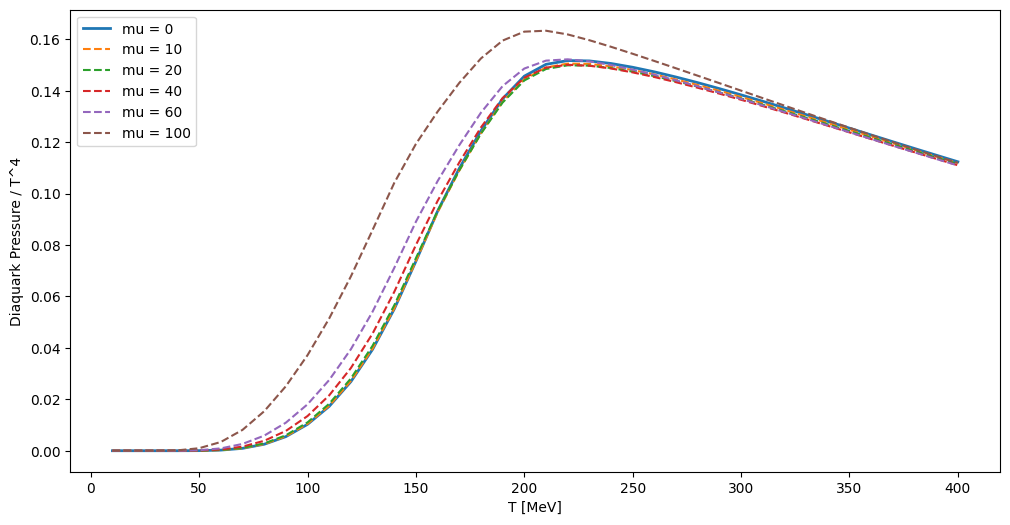

In [ ]:

plt.figure(figsize=(12,6))


xpoints = T

plt.plot(xpoints, 2*np.array(Press0)/T**4, linewidth = 2.0)

ypoints1 = np.array(Press10)+np.array(Pressa10)
ypoints2 = np.array(Press20)+np.array(Pressa20)
ypoints3 = np.array(Press40)+np.array(Pressa40)
ypoints4 = np.array(Press60)+np.array(Pressa60)
ypoints5 = np.array(Press100)+np.array(Pressa100)
# ypoints3 = np.array(pressa)

# #plt.plot(xpoints, (ypoints1 + ypoints3)/T**4)

plt.plot(xpoints, (ypoints1)/T**4, linestyle = "dashed")
plt.plot(xpoints, (ypoints2)/T**4, linestyle = "dashed")
plt.plot(xpoints, (ypoints3)/T**4, linestyle = "dashed")
plt.plot(xpoints, (ypoints4)/T**4, linestyle = "dashed")
plt.plot(xpoints, (ypoints5)/T**4, linestyle = "dashed")

#plt.plot(xpoints, (np.array(pressq))/T**4)

#plt.plot(xpoints, (np.array(pressq))/T**4 + 2*(ypoints1)/T**4)
# plt.plot(xpoints, (ypoints3)/T**4)
# plt.plot(xpoints, (ypoints1+ypoints3)/T**4)

plt.legend(['mu = 0' , 'mu = 10', 'mu = 20',
            'mu = 40' , 'mu = 60', 'mu = 100'])

plt.xlabel('T [MeV]')

plt.ylabel('Diaquark Pressure / T^4')

# plt.show()

In [ ]:
chiTest = []
for i in range(len(T)):
    x = [0,10,20,40,60,100]
    f = [2*Press0[i],
         Press10[i]+Pressa10[i],
         Press20[i]+Pressa20[i],
         Press40[i]+Pressa40[i],
         Press60[i]+Pressa60[i],
         Press100[i]+Pressa100[i]]

    s = np.polyfit(x, f, 4)[2]
    chiTest.append(s)

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def func(x, a, b, c):
    return  a*x**4 + b*x**2 + c


#do the fitting
popt, pcov = curve_fit(func, x, f)

popt

/tmp/ipykernel_62656/3272720631.py:10: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(func, x, f)


array([-1.21124541e+02,  1.48792504e+06,  1.00000000e+00])

In [ ]:
chiTest = []
for i in range(len(T)):
    x = [0,10,20,40,60,100]
    f = [2*Press0[i],
         Press10[i]+Pressa10[i],
         Press20[i]+Pressa20[i],
         Press40[i]+Pressa40[i],
         Press60[i]+Pressa60[i],
         Press100[i]+Pressa100[i]]

    popt, pcov = curve_fit(func, x, f)
    s = popt[1]
    chiTest.append(s)

/tmp/ipykernel_62656/3614211984.py:11: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(func, x, f)


In [ ]:
T = np.arange(10, 410, 10)

In [ ]:
T[24]

np.int64(250)

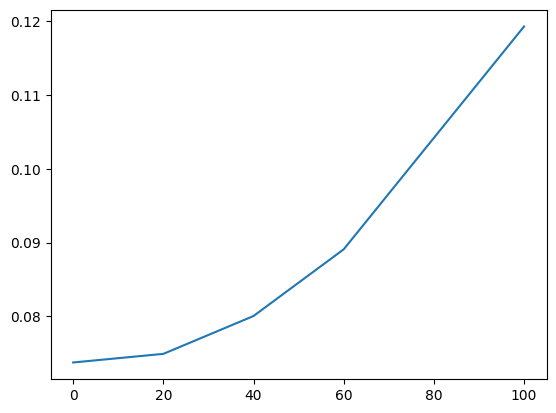

In [ ]:
i = 14

x = [0,20,40,60,100]
f = [2*Press0[i],
         Press20[i]+Pressa20[i],
         Press40[i]+Pressa40[i],
         Press60[i]+Pressa60[i],
         Press100[i]+Pressa100[i]]


plt.plot(x, np.array(f)/T[i]**4)

In [ ]:
f1 = f

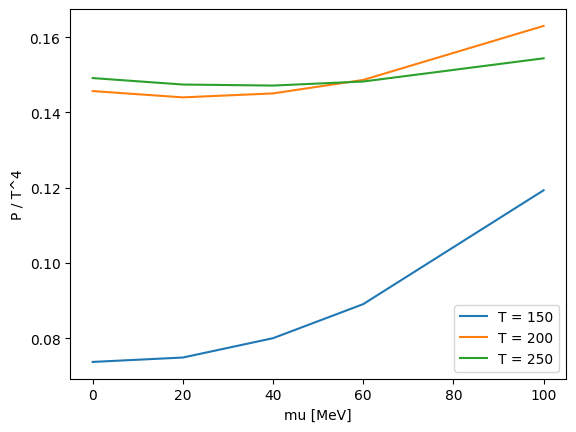

In [ ]:
plt.plot(x, np.array(f1)/150**4)
plt.plot(x, np.array(f2)/200**4)
plt.plot(x, np.array(f3)/250**4)


plt.xlabel("mu [MeV]")

plt.ylabel("P / T^4")


plt.legend(['T = 150' , 'T = 200', 'T = 250'])

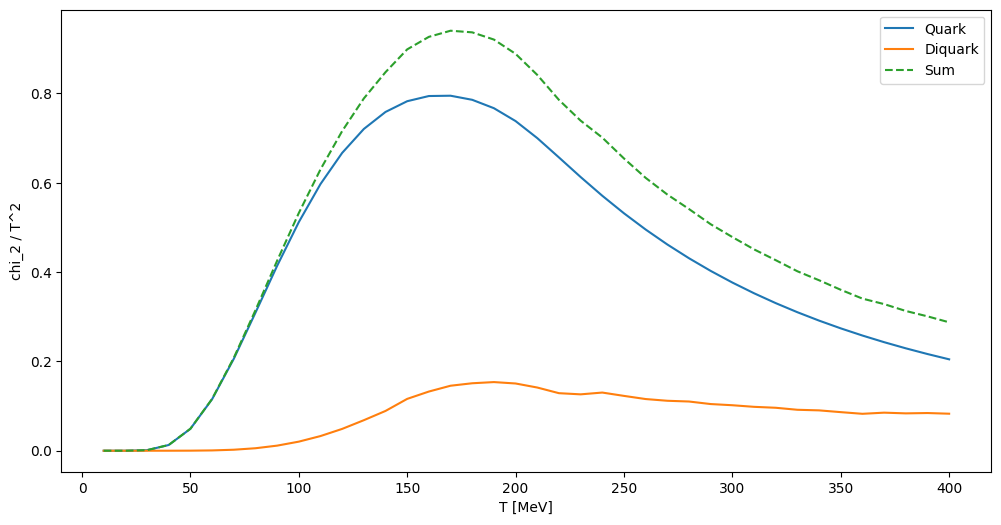

In [ ]:

plt.figure(figsize=(12,6))

plt.plot(xpoints, (np.array(chiq))/T**2)
plt.plot(xpoints, np.array(chiTest)/T**2)

plt.plot(xpoints, (np.array(chiq) + np.array(chiTest))/T**2, linestyle = "dashed")

plt.xlabel("T [MeV]")

plt.ylabel("chi_2 / T^2")


plt.legend(['Quark' , 'Diquark', 'Sum'])


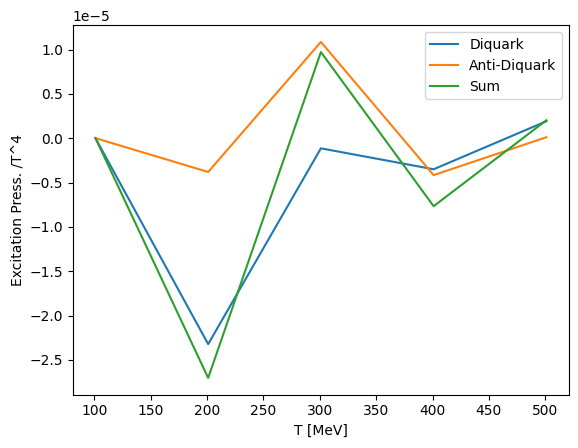

In [ ]:

xpoints = T
ypoints1 = np.array(chi)
ypoints3 = np.array(chia)

#plt.plot(xpoints, (ypoints1 + ypoints3)/T**4)

plt.plot(xpoints, (ypoints1)/T**4)
plt.plot(xpoints, (ypoints3)/T**4)
plt.plot(xpoints, (ypoints1+ypoints3)/T**4)

plt.legend(['Diquark', 'Anti-Diquark', 'Sum'])

plt.xlabel('T [MeV]')

plt.ylabel('Excitation Press. /T^4')

-lt.show()

In [ ]:
import scipy
from scipy import optimize

def DiquarkMass_Sol(T,mu):
    bnds = [(50,2000)]
    x = Pot_Sol(T,mu).x
    l = lambda s: (1-2*Gs*TMQGP.RePi_Diquark(float(s),0,T,mu,float(x[0]),-float(x[1]),float(x[2]),float(x0[0]),float(x0[1]),float(x0[2]),1))**2

    return scipy.optimize.minimize(l, 600 + 2*mu ,method="Nelder-Mead", bounds=bnds)